<center><b style="font-size: 200%">Project II</b><br><br><b style="font-size: 150%"> Exploratory Data Analysis (EDA) - Advertising car sales<center>

## Descrption       
You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## What sells a car?        
- Determine what influence the sale of a vehicle
- Exploratory Data Analysis to a real-life

 # Index
<div class="alert alert-block alert-info" style="margin-top: 20px">
    
<a href="#1">I   -   Open the data file and study the general information</a>
    
<a href="#2">II  -  Data preprocessing</a>
    
<a href="#3">III - Make calculations and add them to the table</a>
    
<a href="#4">IV  - Carry out exploratory data analysis</a>
    
<a href="#5">V   - Closer look at each of one of these variables</a>
    
<a href="#6">VI  - General conclusion</a>
</div>

<div id="1"><h2>I - Open the data file and study the general information</h2></div>

Loading all the libraries:*pandas*,*numpy*,*matplotlib* etc.

In [1]:
# import pandas & numpy liberaries
import pandas as pd
import numpy as np

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# plotly for interactive visualization
import plotly.express as px

# For Transforming date and time
import time
import datetime
from datetime import datetime

from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the data file 
try:
    vehicles_ads = pd.read_csv('/datasets/vehicles_us.csv')
except:
    vehicles_ads = pd.read_csv('c:\\Users\\motit/vehicles_us.csv')

<div>
    <h3>First look at the dataset</h3> 
</div>

In [3]:
# use the head, tail, sample and describe etc. method to view the first rows
pd.concat([vehicles_ads.dtypes, vehicles_ads.count(),vehicles_ads.isna().sum(),vehicles_ads.isna().sum()/len(vehicles_ads)], keys=['type','count','na','na%'], axis=1)
vehicles_ads.head(10)
vehicles_ads.tail(10)
vehicles_ads.sample(10)
vehicles_ads.describe()
vehicles_ads.describe(include='all')

type  count     na       na%
price           int64  51525      0  0.000000
model_year    float64  47906   3619  0.070238
model          object  51525      0  0.000000
condition      object  51525      0  0.000000
cylinders     float64  46265   5260  0.102086
fuel           object  51525      0  0.000000
odometer      float64  43633   7892  0.153168
transmission   object  51525      0  0.000000
type           object  51525      0  0.000000
paint_color    object  42258   9267  0.179854
is_4wd        float64  25572  25953  0.503697
date_posted    object  51525      0  0.000000
days_listed     int64  51525      0  0.000000

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
5    automatic   sedan       black     1.0  2018-06-20           15  
6    automatic   sedan       white     NaN  2018-12-27           73  
7    automatic     SUV       black     1.0  2019-01-07           68  
8    automatic     SUV         NaN     1.0  2018-07-16           19  
9    automatic     SUV        blue     1.0  2019-02-15           17

price  model_year                       model  condition  cylinders  \
51515  12000      2005.0  chevrolet silverado 2500hd       good        8.0   
51516   8999      2011.0         jeep grand cherokee       good        6.0   
51517  11000      2012.0               dodge charger  excellent        8.0   
51518   3750      2005.0                 ford taurus  excellent        6.0   
51519  11750      2015.0                honda accord  excellent        4.0   
51520   9249      2013.0               nissan maxima   like new        6.0   
51521   2700      2002.0                 honda civic    salvage        4.0   
51522   3950      2009.0              hyundai sonata  excellent        4.0   
51523   7455      2013.0              toyota corolla       good        4.0   
51524   6300      2014.0               nissan altima       good        4.0   

         fuel  odometer transmission    type paint_color  is_4wd date_posted  \
51515  diesel  228000.0    automatic  pickup      silver     1.0  2018-08-18   
51516     gas       NaN    automatic     SUV       white     1.0  2018-11-01   
51517     gas   81000.0    automatic   sedan       black     NaN  2019-04-19   
51518     gas  110200.0    automatic   sedan      silver     NaN  2018-08-10   
51519     gas       NaN    automatic   coupe         NaN     NaN  2018-11-24   
51520     gas   88136.0    automatic   sedan       black     NaN  2018-10-03   
51521     gas  181500.0    automatic   sedan       white     NaN  2018-11-14   
51522     gas  128000.0    automatic   sedan        blue     NaN  2018-11-15   
51523     gas  139573.0    automatic   sedan       black     NaN  2018-07-02   
51524     gas       NaN    automatic   sedan         NaN     NaN  2018-06-05   

       days_listed  
51515           52  
51516           51  
51517           44  
51518           63  
51519           89  
51520           37  
51521           22  
51522           32  
51523           71  
51524           10

price  model_year                     model  condition  cylinders  \
32087  13900      2012.0           gmc sierra 1500       good        8.0   
39480  29995      2017.0                ford f-150  excellent        6.0   
10363   8849      2014.0       dodge grand caravan  excellent        6.0   
46209  52900      2018.0         gmc sierra 2500hd   like new        8.0   
42073   6500      2007.0                gmc sierra       good        5.0   
38571   5899      2007.0              toyota prius       good        4.0   
34465  17800      2011.0             toyota tacoma  excellent        6.0   
6400    2495      2005.0           hyundai elantra       good        6.0   
19751  15500      2014.0  chevrolet silverado 1500  excellent        8.0   
36423   6000      2014.0                ford focus       good        4.0   

         fuel  odometer transmission       type paint_color  is_4wd  \
32087     gas       NaN    automatic      truck         NaN     1.0   
39480     gas   31928.0    automatic      truck        blue     1.0   
10363     gas   85771.0    automatic        van       white     NaN   
46209  diesel   30000.0    automatic     pickup       black     1.0   
42073     gas       NaN    automatic     pickup       black     NaN   
38571  hybrid   94857.0    automatic  hatchback         NaN     NaN   
34465     gas  112000.0    automatic     pickup        grey     1.0   
6400      gas       NaN    automatic      sedan       black     NaN   
19751     gas       NaN    automatic      truck       white     1.0   
36423     gas   90215.0    automatic      sedan      silver     NaN   

      date_posted  days_listed  
32087  2019-02-03            5  
39480  2018-08-09           19  
10363  2019-02-18           70  
46209  2018-11-08            2  
42073  2018-05-28           17  
38571  2018-08-30           52  
34465  2019-04-19           23  
6400   2019-01-19            7  
19751  2018-12-13           48  
36423  2019-03-04           47

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

price    model_year       model  condition     cylinders  \
count    51525.000000  47906.000000       51525      51525  46265.000000   
unique            NaN           NaN         100          6           NaN   
top               NaN           NaN  ford f-150  excellent           NaN   
freq              NaN           NaN        2796      24773           NaN   
mean     12132.464920   2009.750470         NaN        NaN      6.125235   
std      10040.803015      6.282065         NaN        NaN      1.660360   
min          1.000000   1908.000000         NaN        NaN      3.000000   
25%       5000.000000   2006.000000         NaN        NaN      4.000000   
50%       9000.000000   2011.000000         NaN        NaN      6.000000   
75%      16839.000000   2014.000000         NaN        NaN      8.000000   
max     375000.000000   2019.000000         NaN        NaN     12.000000   

         fuel       odometer transmission   type paint_color   is_4wd  \
count   51525   43633.000000        51525  51525       42258  25572.0   
unique      5            NaN            3     13          12      NaN   
top       gas            NaN    automatic    SUV       white      NaN   
freq    47288            NaN        46902  12405       10029      NaN   
mean      NaN  115553.461738          NaN    NaN         NaN      1.0   
std       NaN   65094.611341          NaN    NaN         NaN      0.0   
min       NaN       0.000000          NaN    NaN         NaN      1.0   
25%       NaN   70000.000000          NaN    NaN         NaN      1.0   
50%       NaN  113000.000000          NaN    NaN         NaN      1.0   
75%       NaN  155000.000000          NaN    NaN         NaN      1.0   
max       NaN  990000.000000          NaN    NaN         NaN      1.0   

       date_posted  days_listed  
count        51525  51525.00000  
unique         354          NaN  
top     2019-03-17          NaN  
freq           186          NaN  
mean           NaN     39.55476  
std            NaN     28.20427  
min            NaN      0.00000  
25%            NaN     19.00000  
50%            NaN     33.00000  
75%            NaN     53.00000  
max            NaN    271.00000

<b style="font-size: 120%">Checking 0's</b>

In [4]:
#looking for zeros
for i in vehicles_ads:
    print(i,len(vehicles_ads[vehicles_ads[i]==0]))

price 0
model_year 0
model 0
condition 0
cylinders 0
fuel 0
odometer 185
transmission 0
type 0
paint_color 0
is_4wd 0
date_posted 0
days_listed 54


<div>
    <h3>Data info</h3> 
</div>

In [5]:
# dtype info
vehicles_ads.info()

# Number of rows / columns ()
vehicles_ads.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(51525, 13)

<h3>The dataset contains the following columns:</h3>

`price` - the market value or seller amount request for sale it


`model_year` - when the car was made or sale by the dealership 


`model`- the factory name for the car


`condition` - the current status compere to what the car staus was new


`cylinders` - numbers of chambers where fuel is combusted


`fuel` — gas, diesel, etc.


`odometer` — the vehicle's mileage when the ad was published


`transmission` - manual , automatic , etc.


`paint_color` - the outside color & paint finish solid, metallic etc.


`is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)


`date_posted` — the date the ad was published


`days_listed` — from publication to removal


<h4>Other columns in our dataset:</h4>
    
`type` - vehicle configuration : bus, suv , pickup etc

`brand`- car manfactory name : ford , nissan , toyota

<h4>Missing values:</h4>

`is_4wd`: only 25572 of 51525 rows (diffrence of 25953 rows)

`paint_color`: only 42258 of 51525 rows (diffrence of 9267 rows)

`odometer`: only 43633 of 51525 rows (diffrence of 7892 rows)

`cylinders`: only 46265 of 51525 rows (diffrence of 5260 rows)

`model_year`: only 47906 of 51525 rows (diffrence of 3619 rows)

<h4>More info from about our DataSet:</h4>

`Price`: highest : 375,000 / Lowest  :  1 

`model_year`: Newest : 2019 / Oldest : 1908 

`model`: in the top we have the pickup "chevrolet silverado" with 3442 ads and bottom the van "mercedes-benz benze sprinter 2500" with 41 ads

`odometer`: highest : 990,000 / Lowest  :  1  

`condition`: we can see that seller rank there vehicles as excellent condtion with 24773 ad , when only 115 ads show salvage vehicles

`cylinders`: most of them 6 - 8 with 16545 ads and only 2 ads 12.

`fuel`: our top of the list is gasoline with 47288 ads and only 6 in electric

`transmission`: most of the vehicles in our ads automatic 46902 ads when 1794 our other

<h4>Dtype Issues:</h4>

`is_4wd` -     need to change from `float` to `Int`

`odometer` -   need to change change from `float` to `Int`

`cylinders`-   need to change change from `float` to `Int`

`model_year` - need to change change from `float` to `Int`

`avg_miles_year` - need to change change from `float` to `Int`

<h4>Fun facts in our Dataset before filterd:</h4>
<h5>The most expansive:</h5>
375k - 1999 nissan frontier pickup
<h5>The most mileages:</h5>
990k - 1964 Chevy corvette and 2013 cruze 

In [6]:
# create a dictionary mapping model to its brand
brands = dict(zip(vehicles_ads['model'], vehicles_ads['model'].str.split(expand=True)[0]))

def create_brands(model):
    """
    Check whether model is present in brands dictionary, and return brand if present. 
    Otherwise returnmodel
    """
    if model in brands:
        return brands[model]
    return model

# create new field by applying create_brands() to each model
vehicles_ads['brand'] = vehicles_ads['model'].apply(create_brands)

<div id="2"><h2>II - Data preprocessing</h2></div>

In [7]:
# number of missing values per column
vehicles_ads.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
brand               0
dtype: int64

In [8]:
# calc the % of missing values
def missing_val(vehicles_ads):
        # Total missing values
        no_val = vehicles_ads.isnull().sum()
        
        # % of missing values
        no_val_percent = 100 * vehicles_ads.isnull().sum() / len(vehicles_ads)
        
        # Make a table with the results
        no_val_table = pd.concat([no_val, no_val_percent], axis=1)
        
        # Rename the columns
        no_val_table_ren_columns = no_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% in the Dataset'})
        
        # Sort the table by percentage of missing descending
        no_val_table_ren_columns = no_val_table_ren_columns[
            no_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% in the Dataset', ascending=False).round(1)

        # Return the dataframe with missing information
        return no_val_table_ren_columns

In [9]:
# check missing values
missing_val(vehicles_ads)

Missing Values  % in the Dataset
is_4wd                25953              50.4
paint_color            9267              18.0
odometer               7892              15.3
cylinders              5260              10.2
model_year             3619               7.0

In [10]:
# check the statistics of the numerical variables
vehicles_ads.describe()

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

<b style="font-size: 130%">Intermediate conclusions</b> 

`is_4wd` with 50.4% missing values, this mean half of the vehicles in our list doesn't have this system

`paint_color` with 18% missing values, maybe the color didn't show in the list of colors to choice from 

`odometer` with 15.3% missing values, seller didn't want to expose it or didn't know how many mileage

`cylinders` with 10.2% missing values , my guess the seller don't know this info

`model_year` with 7% missing values , look like import data issue from one database to another

<h4>Process `model_year`column:</h4>

In [11]:
# distribution of brand for those ads where the model_year is missing
vehicles_ads[vehicles_ads['model_year'].isnull()]['brand'].value_counts(normalize=True).head(10)

# distribution of brand for those ads where the model_year is present
vehicles_ads[vehicles_ads['model_year'].notnull()]['brand'].value_counts(normalize=True).head(10)

# distribution of top 10 model_year 
vehicles_ads['model_year'].value_counts(normalize=True).head(10)

ford         0.243714
chevrolet    0.200608
toyota       0.106659
honda        0.066593
jeep         0.066317
nissan       0.066040
ram          0.063277
gmc          0.047251
dodge        0.026803
subaru       0.025974
Name: brand, dtype: float64

ford         0.246107
chevrolet    0.206342
toyota       0.105603
honda        0.067716
ram          0.064439
jeep         0.063478
nissan       0.061976
gmc          0.046069
subaru       0.024590
dodge        0.024172
Name: brand, dtype: float64

2013.0    0.074083
2012.0    0.072392
2014.0    0.071974
2011.0    0.070450
2015.0    0.069365
2016.0    0.061662
2008.0    0.061036
2010.0    0.056173
2007.0    0.055171
2017.0    0.050495
Name: model_year, dtype: float64

In [12]:
# Filling model_year missing values based on 'model' using transform and median
vehicles_ads['model_year']=vehicles_ads['model_year'].fillna(vehicles_ads.groupby(['model'])['model_year'].transform('median'))
vehicles_ads.model_year.describe()

count    51525.000000
mean      2009.793954
std          6.099296
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [13]:
#change the model 1908 since the vehicles on the list with this year start there life in 1992 
vehicles_ads['model_year'].replace([1908],[1998], inplace=True)
vehicles_ads.model_year.describe()

count    51525.000000
mean      2009.797448
std          6.066678
min       1929.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

<h4> Process `odometer` column:</h4>

In [14]:
# distribution of brands for missing odometer
vehicles_ads[vehicles_ads['odometer'].isnull()]['brand'].value_counts(normalize=True).head(10)

ford         0.247466
chevrolet    0.200329
toyota       0.102509
ram          0.066776
nissan       0.065256
honda        0.064116
jeep         0.062848
gmc          0.047136
hyundai      0.024328
subaru       0.024075
Name: brand, dtype: float64

In [15]:
# fill missing values and replace 0's in 'odometer' with mean
vehicles_ads['odometer'].fillna((vehicles_ads['odometer'].mean()), inplace=True)
vehicles_ads['odometer']=vehicles_ads['odometer'].replace(0,vehicles_ads['model_year'].mean())
vehicles_ads['odometer'].head()

0    145000.000000
1     88705.000000
2    110000.000000
3    115553.461738
4     80903.000000
Name: odometer, dtype: float64

<h4> Process `cylinders` column:</h4>

In [16]:
# Filling cylinders missing values based on 'model' & 'cylinders' using transform 
vehicles_ads['cylinders'] = vehicles_ads.groupby('model')['cylinders']\
.transform(lambda grp : grp.fillna(np.median(grp)))
vehicles_ads['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [17]:
vehicles_ads[vehicles_ads['cylinders'].isnull()].head()

# distribution of brand for those ads where the cylinders is present
vehicles_ads[vehicles_ads['cylinders'].notnull()]['brand'].value_counts(normalize=True).head(10)

price  model_year              model  condition  cylinders fuel  odometer  \
9    9200      2008.0        honda pilot  excellent        NaN  gas  147191.0   
36  10499      2013.0       chrysler 300       good        NaN  gas   88042.0   
37   7500      2005.0      toyota tacoma       good        NaN  gas  160000.0   
59   5200      2006.0  toyota highlander       good        NaN  gas  186000.0   
63  30000      1966.0       ford mustang  excellent        NaN  gas   51000.0   

   transmission         type paint_color  is_4wd date_posted  days_listed  \
9     automatic          SUV        blue     1.0  2019-02-15           17   
36    automatic        sedan         NaN     NaN  2018-05-05           22   
37    automatic       pickup         NaN     NaN  2018-07-22           44   
59    automatic          SUV       green     NaN  2018-12-20            2   
63       manual  convertible         red     NaN  2019-01-23           17   

       brand  
9      honda  
36  chrysler  
37    toyota  
59    toyota  
63      ford

ford         0.245650
chevrolet    0.206095
toyota       0.105436
honda        0.067805
ram          0.064109
jeep         0.063482
nissan       0.062401
gmc          0.046623
subaru       0.024597
dodge        0.024468
Name: brand, dtype: float64

In [18]:
# distribution of brand for those ads where the cylinders is missing
vehicles_ads[vehicles_ads['cylinders'].isnull()]['brand'].value_counts(normalize=True).head(10)

# distribution of cylinders before replacement
vehicles_ads['cylinders'].mask(vehicles_ads['cylinders'] < 3, 3, inplace=True)
vehicles_ads['cylinders'].mask(vehicles_ads['cylinders'] >= 12, 10, inplace=True)
vehicles_ads['cylinders'].value_counts(normalize=True)

ford         0.248479
chevrolet    0.204563
toyota       0.107795
ram          0.066540
honda        0.066160
jeep         0.065399
nissan       0.061027
gmc          0.042015
subaru       0.025475
dodge        0.023384
Name: brand, dtype: float64

8.0     0.342462
6.0     0.339349
4.0     0.299665
10.0    0.011910
5.0     0.005879
3.0     0.000735
Name: cylinders, dtype: float64

In [19]:
# distribution of cylinders after replacement
vehicles_ads['cylinders'].value_counts(normalize=True)

# excluding nulls, probabilities associated with each cylinder type
p = vehicles_ads['cylinders'].value_counts(normalize=True).values
a = vehicles_ads['cylinders'].value_counts(normalize=True).index
size = vehicles_ads[vehicles_ads['cylinders'].isnull()].shape[0]
possible_cylinders = np.random.choice(a, size=size, p=p)
vehicles_ads.loc[vehicles_ads['cylinders'].isnull(), 'cylinders'] = possible_cylinders 

8.0     0.342462
6.0     0.339349
4.0     0.299665
10.0    0.011910
5.0     0.005879
3.0     0.000735
Name: cylinders, dtype: float64

<h4> Process `paint_color` column:</h4>

In [20]:
vehicles_ads['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [21]:
# marge missing values in `paint_color` with the exist value = custom
vehicles_ads.loc[vehicles_ads['paint_color'].isnull(), 'paint_color'] = 'custom'
vehicles_ads['paint_color'].value_counts()

custom    10420
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

<h4> Process `is_4wd` column:</h4>

In [22]:
# distribution of brand for those ads where the is_4wd is missing
vehicles_ads[vehicles_ads['is_4wd'].isnull()]['brand'].value_counts(normalize=True).head(10)

ford          0.231495
chevrolet     0.191192
toyota        0.139175
honda         0.103764
nissan        0.092012
hyundai       0.039995
dodge         0.038839
volkswagen    0.033021
chrysler      0.029939
ram           0.027897
Name: brand, dtype: float64

In [23]:
# distribution of is_4wd after replacement with 0's 
vehicles_ads.loc[vehicles_ads['is_4wd'].isnull(), 'is_4wd'] = 0
vehicles_ads['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [24]:
# distribution of brand for those ads where the is_4wd is present
vehicles_ads[vehicles_ads['is_4wd'].notnull()]['brand'].value_counts(normalize=True).head(10)

ford         0.245939
chevrolet    0.205939
toyota       0.105677
honda        0.067637
ram          0.064357
jeep         0.063678
nissan       0.062261
gmc          0.046152
subaru       0.024687
dodge        0.024357
Name: brand, dtype: float64

In [25]:
# check missing values after the changes that we made
vehicles_ads.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
brand           0
dtype: int64

<b style="font-size: 130%">Intermediate conclusions</b>

The missing value in our dataset is random (MAR) since it doesn't show any pattern we can point of , we also fix all the NaN or missing values we have.

`model_year` - using transform and median to fill the missing values , we also notice that the oldest cars are from "1908" quick check show that both cars "gmc yukon" & "cadillac escalade" only start to sale in the 90's so we change it to "1998" which is more correct, so now the oldest car is from 1929

`odometer` - we use fillna and mean to calc the missing values in this column and repleace the 0's with mean and `model_year`

`cylinders` - using transform and median to fill the missing values , also we change insted of drop or trim the less than 3 to 3 and the 12 to 10 since the two in our list wasn't have engine with this amount of `cylinders`

`paint color` - change the "NaN" with the existing option "custom" which can be color that the seller didn't choice or wrote when upload the ad or color that has been specially prepared for this vehicle and is not part of the standard range of colors like: pastel colors, chameleon, candy etc.

`is_4wd` - replace the "NaN" with 0's since cars with 4wd show as 1 in the dataset

<div><h2>My private mission to make this dataset better in this columns:</h2></div>

<h4>`fuel`column:</h4>

In [26]:
vehicles_ads['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [27]:
# Address the problematic values, if they exist
vehicles_ads['fuel'].replace(['electric','gas'],['other','gasoline'], inplace=True)
vehicles_ads['fuel'].value_counts()

gasoline    47288
diesel       3714
hybrid        409
other         114
Name: fuel, dtype: int64

<h4>`price`column:</h4>

In [28]:
vehicles_ads['price'].replace([1],[0], inplace=True)
vehicles_ads.price.value_counts()

0        798
6995     719
5995     655
4995     624
3500     620
        ... 
27216      1
14772      1
5963       1
48990      1
23431      1
Name: price, Length: 3443, dtype: int64

<h4>`model`column:</h4>

In [29]:
vehicles_ads['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [30]:
# little improve to the existing model vehicles
vehicles_ads['model'].replace(['mercedes-benz benze sprinter 2500','chevrolet silverado 1500','ram 2500','ram 1500'],
                              ['mercedes-benz sprinter','chevrolet silverado','dodge ram','dodge ram'], inplace=True)
vehicles_ads.model.value_counts()

chevrolet silverado       3442
dodge ram                 2841
ford f-150                2796
jeep wrangler             1119
toyota camry               990
                          ... 
ford f-250 super duty      241
kia sorento                236
acura tl                   236
nissan murano              235
mercedes-benz sprinter      41
Name: model, Length: 98, dtype: int64

</h4> Process `transmission`column:</h4>

In [31]:
vehicles_ads['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [32]:
# Address the problematic values, if they exist
vehicles_ads['transmission'].replace(['other'],['automatic'], inplace=True)
vehicles_ads['transmission'].value_counts()

automatic    48696
manual        2829
Name: transmission, dtype: int64

<h4>`type`column:</h4>

In [33]:
vehicles_ads['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [34]:
# Address the problematic values, if they exist
vehicles_ads['type'] = vehicles_ads['type'].str.lower()
vehicles_ads['type'].replace(['mini-van'],['van'], inplace=True)
vehicles_ads['type'].replace(['offroad'],['suv'], inplace=True)
vehicles_ads['type'].mask(vehicles_ads['is_4wd'] == 1, 'suv', inplace=True)
vehicles_ads['type'].mask(vehicles_ads['brand'] == 'jeep', 'suv', inplace=True)
vehicles_ads['type'].replace(['sedan','coupe','convertible','hatchback','wagon','other'],
                             ['famliy_car','famliy_car','famliy_car','famliy_car','famliy_car','famliy_car'], inplace=True)
vehicles_ads['type'].value_counts()

suv           29169
famliy_car    15663
truck          2992
pickup         1962
van            1715
bus              24
Name: type, dtype: int64

<b style="font-size: 130%">Intermediate conclusions</b>

my personal view on some columns, couldn't leave them in the way they show and i need to change and improve them even if it's little bit.

`model` - we found some diffrent name to the same vehicles like "chevrolet silverado 1500" and "chevrolet silverado" with little changes using the replace option we fix it. 

`fuel` - there was other with 108 ads and electric with 6 ads only and since this two can be together, i decied to add the electric to other. why no electric insted of other? since excapt from hybrid , gas or diesel there is some altrnative fuel like vegetable oil, natural gas or hydrogen. also been change gas to gasoline.

`transmission` - since most of our ads automatic and other transmission excapt manual are kind of diffrent versions of automatic i decied to marge the other with automatic 

`price`- we chagne the "1" to "0" since it's the same and better logical this way

`type` - i replace the "mini-van" with "van" , i add the offroad ads to suv (sport utility vehicle) since in today market it's the same even if it's not come with 4wd system they can go off road and we lower case the values so won't be any uppercase or mix match, replace all this 'sedan','coupe','convertible','hatchback','wagon','other (none 4wd)' with famliy_car value , take all 4wd with exist system to 'suv' , 'Jeep i did the same. 

<h3>Data type replacement</h3>

In [35]:
# convert 'float' to 'Int'
vehicles_ads['model_year'] = vehicles_ads['model_year'].astype('int64')
vehicles_ads['cylinders'] = vehicles_ads['cylinders'].astype('int64')
vehicles_ads['odometer'] = vehicles_ads['odometer'].astype('int64')
vehicles_ads['is_4wd'] = vehicles_ads['is_4wd'].astype('int64')

# check data types
vehicles_ads.dtypes

price            int64
model_year       int64
model           object
condition       object
cylinders        int64
fuel            object
odometer         int64
transmission    object
type            object
paint_color     object
is_4wd           int64
date_posted     object
days_listed      int64
brand           object
dtype: object

<b style="font-size: 130%">Intermediate conclusions</b>

we change all the `float` columns with `int` using the `astype()` , now are values data in the correct type and ready for some analysis

<div id="3"><h2>III - Make calculations and add them to the table</h2></div>

<b style="font-size: 100%">Process`condition`column:</b>

Dictionary for `condition` call `condition_dict`, replacing the string values with numeric the following:

new = 5

like new = 4

excellent = 3

good = 2

fair = 1

salvage = 0

In [36]:
vehicles_ads['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [37]:
condition_dict={
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0,      
}

In [38]:
condition_dict.keys()

dict_keys(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])

In [39]:
condition_dict.values()

dict_values([5, 4, 3, 2, 1, 0])

In [40]:
vehicles_ads['condition']=vehicles_ads['condition'].apply(lambda x: condition_dict.get(x))
vehicles_ads.head()

price  model_year           model  condition  cylinders      fuel  \
0   9400        2011          bmw x5          2          6  gasoline   
1  25500        2011      ford f-150          2          6  gasoline   
2   5500        2013  hyundai sonata          4          4  gasoline   
3   1500        2003      ford f-150          1          8  gasoline   
4  14900        2017    chrysler 200          3          4  gasoline   

   odometer transmission        type paint_color  is_4wd date_posted  \
0    145000    automatic         suv      custom       1  2018-06-23   
1     88705    automatic         suv       white       1  2018-10-19   
2    110000    automatic  famliy_car         red       0  2019-02-07   
3    115553    automatic      pickup      custom       0  2019-03-22   
4     80903    automatic  famliy_car       black       0  2019-04-02   

   days_listed     brand  
0           19       bmw  
1           50      ford  
2           79   hyundai  
3            9      ford  
4           28  chrysler

In [41]:
# change `date_posted` to datetime
vehicles_ads['date_posted'] = pd.to_datetime(vehicles_ads['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# add new features to table
vehicles_ads['week'] = vehicles_ads['date_posted'].dt.week #`week` ad was placed
vehicles_ads['month'] = vehicles_ads['date_posted'].dt.month #`month` ad was placed
vehicles_ads['year'] = vehicles_ads['date_posted'].dt.year #`year` ad was placed
vehicles_ads['dow'] = vehicles_ads['date_posted'].dt.dayofweek #`day` ad was placed

In [42]:
# Add the vehicle's age when the ad was placed
vehicles_ads['age'] = vehicles_ads['year'] - vehicles_ads['model_year'] + 1

# Add the vehicle's average mileage year and change avg_miles_year type from float to int
vehicles_ads['avg_miles_year'] = vehicles_ads['odometer'] / vehicles_ads['age']
vehicles_ads['avg_miles_year'] = vehicles_ads['avg_miles_year'].astype('int64')

In [43]:
vehicles_ads[(vehicles_ads.age.isnull())&(vehicles_ads.avg_miles_year.isnull())].values.any()

False

<h4>Duplicates</h4>

In [44]:
vehicles_ads.duplicated().sum()

0

In [45]:
vehicles_ads.dtypes

price                      int64
model_year                 int64
model                     object
condition                  int64
cylinders                  int64
fuel                      object
odometer                   int64
transmission              object
type                      object
paint_color               object
is_4wd                     int64
date_posted       datetime64[ns]
days_listed                int64
brand                     object
week                       int64
month                      int64
year                       int64
dow                        int64
age                        int64
avg_miles_year             int64
dtype: object

<h4>Intermediate conclusions</h4>

<b>Highlights:</b>

- New Columns `age` , `dow` , `week` , `month` , `year` , `avg_miles_year`


- Numeric the rank of `condition` by Create a dictionary `condition_dict`


- No duplicates in our dataset


- There are 0 ads with negative age

We create a dictionary that change the rank `condition` from string values to numeric so now it's looks like this **before** [new , excellent , good , fair , salvage] **after** [5 , 4 , 3 , 2 , 1 , 0]

then we calculated the day of the week , week , month and year of when the ad was placed and also the average of `avg_miles_year` , also we calculate age of the vehicle by taking the difference between date_posted year and model_year 

<div id="4"><h2>IV - Carry out exploratory data analysis</h2></div>

<h4>Check correlation among numerical variables</h4>

We start our analysis by checking the correlation of differents variables to determine linear relationship to price

In [46]:
# correlation of several variables to price
vehicles_ads[['price', 'model_year', 'odometer', 'days_listed', 'age', 'avg_miles_year', 'cylinders', 'condition']].corr()

price  model_year  odometer  days_listed       age  \
price           1.000000    0.415237 -0.385417    -0.000682 -0.413933   
model_year      0.415237    1.000000 -0.425960    -0.005554 -0.997117   
odometer       -0.385417   -0.425960  1.000000     0.003490  0.424477   
days_listed    -0.000682   -0.005554  0.003490     1.000000  0.006397   
age            -0.413933   -0.997117  0.424477     0.006397  1.000000   
avg_miles_year  0.196946    0.422823  0.198618    -0.004653 -0.429406   
cylinders       0.266212   -0.131607  0.073491     0.007177  0.131313   
condition       0.221517    0.271036 -0.273180    -0.002404 -0.270132   

                avg_miles_year  cylinders  condition  
price                 0.196946   0.266212   0.221517  
model_year            0.422823  -0.131607   0.271036  
odometer              0.198618   0.073491  -0.273180  
days_listed          -0.004653   0.007177  -0.002404  
age                  -0.429406   0.131313  -0.270132  
avg_miles_year        1.000000  -0.027670   0.076835  
cylinders            -0.027670   1.000000  -0.055872  
condition             0.076835  -0.055872   1.000000

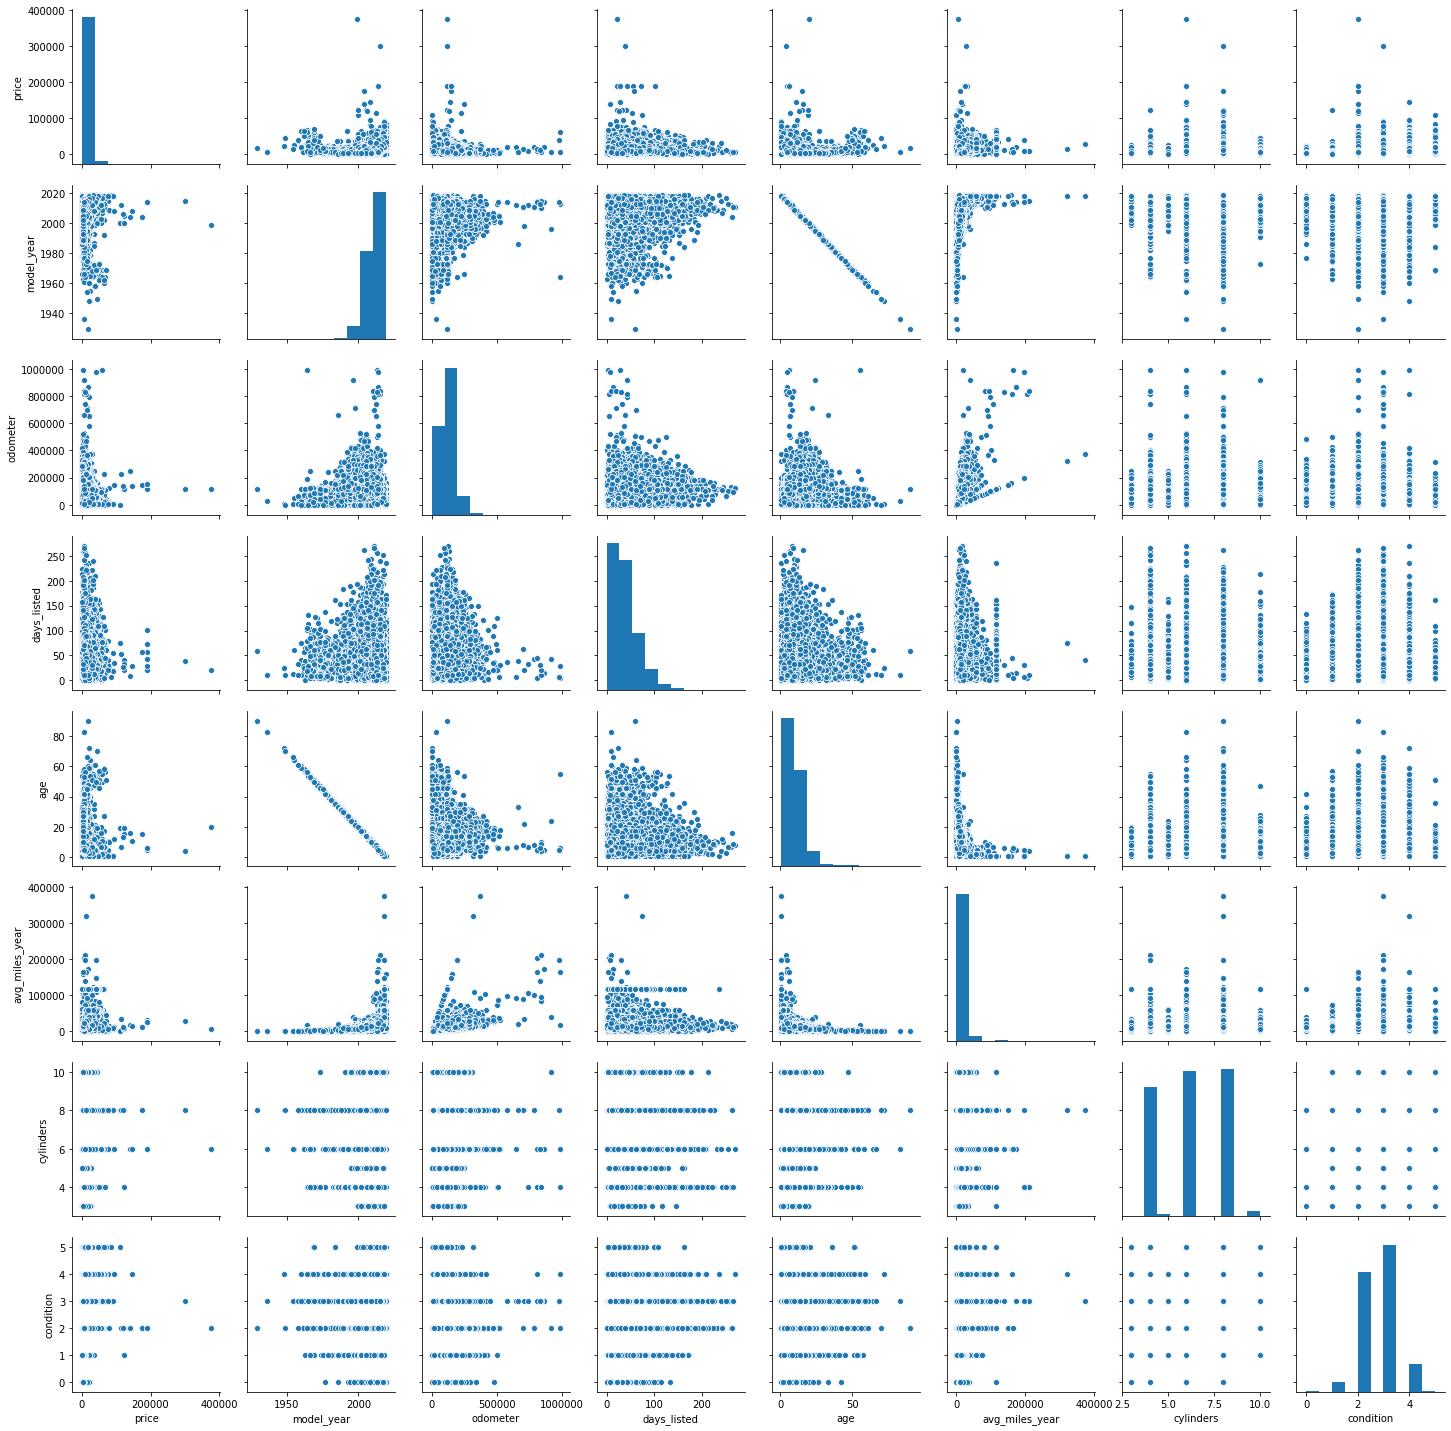

In [47]:
# scatter matrix
sns.pairplot(vehicles_ads[['price', 'model_year', 'odometer', 'days_listed', 'age', 'avg_miles_year', 
                                'cylinders', 'condition']]);

<h4>Intermediate conclusions</h4>

Each cell of this histogram distribution grids show the relationship between two parameters:

first cell in the upper left corner show the connection between `price` vs. `price`, most price lie between 0 and ~30,000.

second cell `price` vs. `model_year` , shows that most vehicles prices below 100k (1960 - 2018).

third cell `price` vs. `odometer` , we see heavily concentrated towards the left with some outliers in the data.

fourth cell `price` vs. `days_listed` also heavily concentrated towards the left, and that at the 0 `days_listed` which mean so many ads were listed , this can tell us that many ads been listed or removed at the same day. to know the answer we need to investigate further. 

This correlation of several numerical variables and the scatter plot shows that our dataset contains outliers. we need to do plot histograms for the following parameters: `price`, vehicle's `age` when the ad was placed, mileage, number of `cylinders`, and `condition` to study how outliers affect the form and readability of the histograms.

We look at this in better details in later section

<h4>Histograms of parameter</h4>

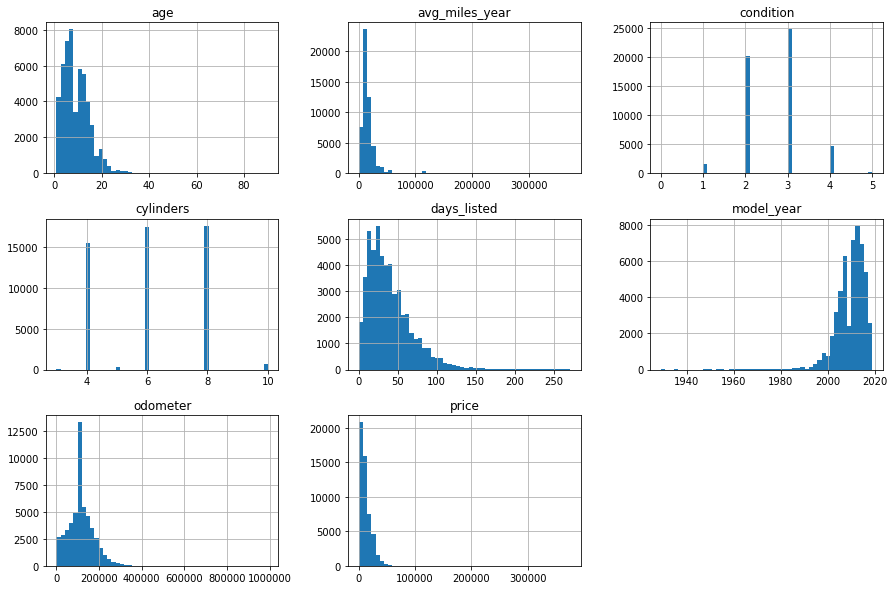

In [48]:
# histogram of selected variables
vehicles_ads[['price', 'model_year', 'odometer', 'days_listed', 'age', 'avg_miles_year',
              'cylinders', 'condition']].hist(bins=50, figsize=(15, 10));

<div id="5"><h2>V - Closer look at each of one of these variables (distribution , correlation , outliers)</h2></div>

In [49]:
# whisker chart
def whis_box(parameter,df,range):
    print();
    print('histogram of: {}'.format(parameter));
    ax = sns.boxplot(data=df, orient="h", palette="Set3",x=parameter);
    plt.xlim(0, range);
    plt.show();

In [50]:
# check the distribution , correlation and outliers of the parameter
def distribution(parameter,df):
    print()
    #print('histogram of: {}'.format(parameter))
    sns.distplot(df[parameter])
    plt.xlabel(parameter);
    plt.ylabel('Frequency');
    plt.show();
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print(df[parameter].describe())
    Q1 = df[parameter].quantile(0.25)
    Q3 = df[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    ninety_five = np.percentile(df[parameter], 95)
    five = np.percentile(df[parameter], 5)
    print()
    print('-----------Percentile-------------')
    print('Percentile Lower border:',five)
    print('Percentile Upper border:',ninety_five)
    print('----------------------------------')
    print('Any values below',five,"and above",ninety_five,"can consider outliers")
    print('We have',len(df[(df[parameter]<five)|(df[parameter]>ninety_five)]),
          "values that can consider outliers")
    print()
    print('-------------IQR------------------')
    print('The interquartile range are:',IQR)
    print('IQR Lower border:',min_iqr)
    print('IQR Upper border:',max_iqr)
    print('-----------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('We have',len(df[df[parameter]>max_iqr]),"values that can consider outliers")
    else:
        print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
        print('We have',len(df[(df[parameter]<min_iqr)&(df[parameter]>max_iqr)]),
              "values that can consider outliers") 

In [51]:
# dataset vehicles_filtered to use in the chart and in our dataset in the next stage
vehicles_filtered = vehicles_ads[(np.abs(stats.zscore(vehicles_ads[['price', 'age', 'odometer','avg_miles_year']])) < 3).all(axis=1)]
vehicles_filtered = vehicles_filtered.reset_index(drop=True, inplace=False)

<h4>Price parameter</h4>

<b style="font-size: 130%">'price' before filter out</b>


histogram of: price


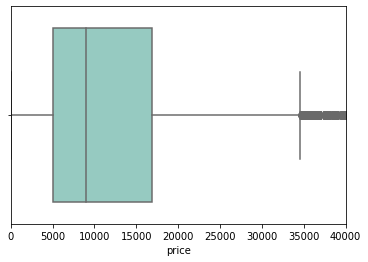

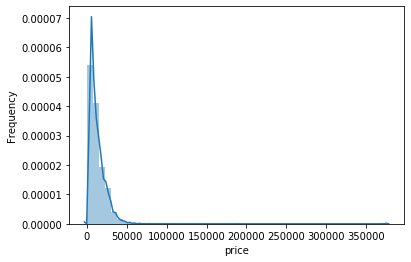

The distribution is skewed to the right
---------------------------------------
count     51525.000000
mean      12132.449432
std       10040.821729
min           0.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

-----------Percentile-------------
Percentile Lower border: 1950.0
Percentile Upper border: 30300.0
----------------------------------
Any values below 1950.0 and above 30300.0 can consider outliers
We have 5141 values that can consider outliers

-------------IQR------------------
The interquartile range are: 11839.0
IQR Lower border: -12758.5
IQR Upper border: 34597.5
-----------------------------------
The outliers are considered to be values above 34597.5
We have 1646 values that can consider outliers


In [52]:
# price before filter out
whis_box('price',vehicles_ads,40000)
distribution('price',vehicles_ads)

<b style="font-size: 130%">'price' after filterd out</b>


histogram of: price


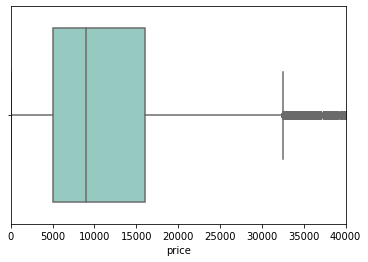

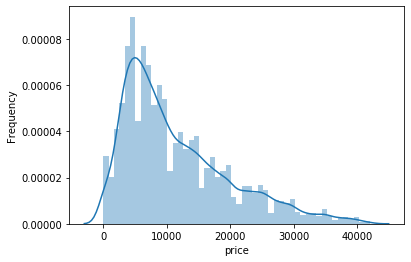

The distribution is skewed to the right
---------------------------------------
count    49230.000000
mean     11552.227138
std       8478.080816
min          0.000000
25%       4999.000000
50%       8995.000000
75%      15995.000000
max      42000.000000
Name: price, dtype: float64

-----------Percentile-------------
Percentile Lower border: 1995.0
Percentile Upper border: 28950.0
----------------------------------
Any values below 1995.0 and above 28950.0 can consider outliers
We have 4876 values that can consider outliers

-------------IQR------------------
The interquartile range are: 10996.0
IQR Lower border: -11495.0
IQR Upper border: 32489.0
-----------------------------------
The outliers are considered to be values above 32489.0
We have 1329 values that can consider outliers


In [53]:
# price after filter out
whis_box('price',vehicles_filtered,40000)
distribution('price',vehicles_filtered)

<h4>Histogram price</h4>

This chart shows us the frequency distribution of `price` in the data.

We can see that the distribution is **skewed right**. 

most vehicle's `price` between the low/medium range. 

with a few exceptions that are distributed along a large range (long "tail") of higher values.

The peak is around 5k, The spread of the data range from 1 to 375k (42k after filterd) with the median at 9k.

<h4>Age parameter</h4>

<b style="font-size: 130%">'age' before filter out</b>


histogram of: age


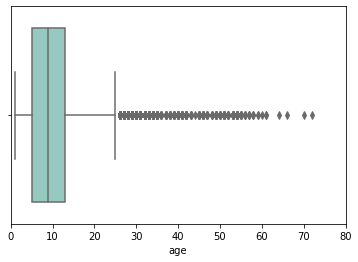

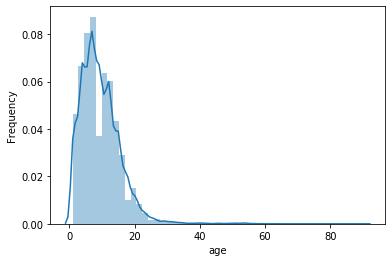

The distribution is skewed to the right
---------------------------------------
count    51525.000000
mean         9.510412
std          6.080608
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         90.000000
Name: age, dtype: float64

-----------Percentile-------------
Percentile Lower border: 2.0
Percentile Upper border: 20.0
----------------------------------
Any values below 2.0 and above 20.0 can consider outliers
We have 4222 values that can consider outliers

-------------IQR------------------
The interquartile range are: 8.0
IQR Lower border: -7.0
IQR Upper border: 25.0
-----------------------------------
The outliers are considered to be values above 25.0
We have 735 values that can consider outliers


In [54]:
# distribution vehicle's age by years
whis_box('age',vehicles_ads,80)
distribution('age',vehicles_ads)

<b style="font-size: 130%">'age' after filterd out</b>


histogram of: age


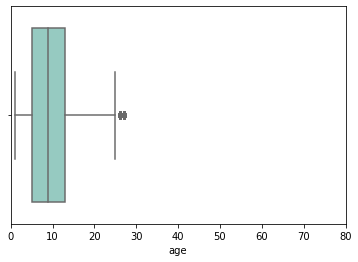

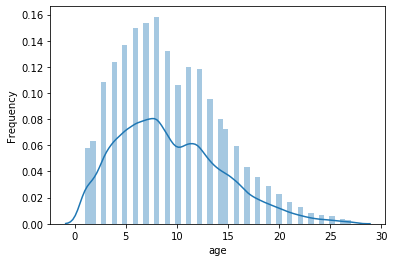

The distribution is skewed to the right
---------------------------------------
count    49230.000000
mean         9.356754
std          5.149738
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         27.000000
Name: age, dtype: float64

-----------Percentile-------------
Percentile Lower border: 2.0
Percentile Upper border: 19.0
----------------------------------
Any values below 2.0 and above 19.0 can consider outliers
We have 3517 values that can consider outliers

-------------IQR------------------
The interquartile range are: 8.0
IQR Lower border: -7.0
IQR Upper border: 25.0
-----------------------------------
The outliers are considered to be values above 25.0
We have 169 values that can consider outliers


In [55]:
# distribution vehicle's age by years filterd
whis_box('age',vehicles_filtered,80)
distribution('age',vehicles_filtered)

<h4>Histogram age</h4>

This histogram shows the distribution of the vehicle's `age` in years in the data.

We can see that the distribution is **skewed right**. 

Most vehicle `age` is between 2 - 20 years (19 after filterd), with a few exceptions that are distributed along a large range (long "tail") of higher value before we filterd.

The spread of the data ranges from 0 - 90 years (27 after filterd) with the median 9 years.

<h4>odometer parameter</h4>

<b style="font-size: 130%">'odometer' before filter out</b>


histogram of: odometer


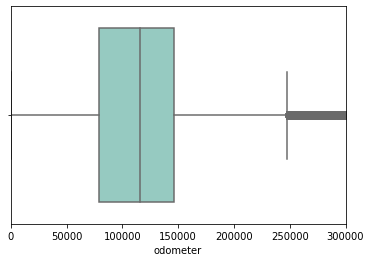

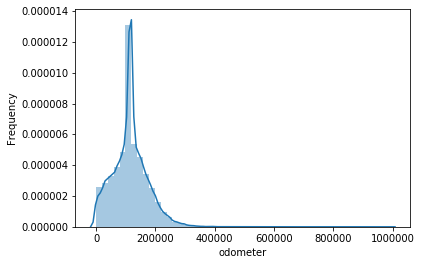

The distribution is skewed to the right
---------------------------------------
count     51525.000000
mean     115560.604309
std       59888.409498
min           1.000000
25%       79181.000000
50%      115553.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

-----------Percentile-------------
Percentile Lower border: 19000.0
Percentile Upper border: 216500.0
----------------------------------
Any values below 19000.0 and above 216500.0 can consider outliers
We have 5136 values that can consider outliers

-------------IQR------------------
The interquartile range are: 67360.0
IQR Lower border: -21859.0
IQR Upper border: 247581.0
-----------------------------------
The outliers are considered to be values above 247581.0
We have 1170 values that can consider outliers


In [56]:
# distribution vehicle's odometer
whis_box('odometer',vehicles_ads,300000)
distribution('odometer',vehicles_ads)

<b style="font-size: 130%">'odometer' after filterd out</b>


histogram of: odometer


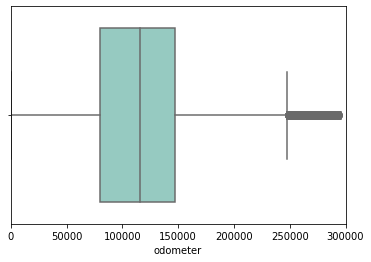

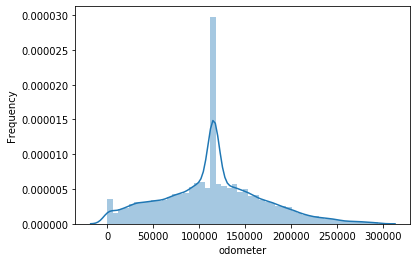

The distribution is skewed to the left
---------------------------------------
count     49230.000000
mean     114835.959009
std       55526.461098
min           1.000000
25%       80000.000000
50%      115553.000000
75%      147000.000000
max      295010.000000
Name: odometer, dtype: float64

-----------Percentile-------------
Percentile Lower border: 20545.0
Percentile Upper border: 212000.0
----------------------------------
Any values below 20545.0 and above 212000.0 can consider outliers
We have 4914 values that can consider outliers

-------------IQR------------------
The interquartile range are: 67000.0
IQR Lower border: -20500.0
IQR Upper border: 247500.0
-----------------------------------
The outliers are considered to be values above 247500.0
We have 790 values that can consider outliers


In [57]:
# distribution vehicle's odometer filterd
whis_box('odometer',vehicles_filtered,300000)
distribution('odometer',vehicles_filtered)

<h4>Histogram cylinders</h4>

This histogram shows the distribution of the vehicle's number of mileage in the data.

We can see that the distribution is **skewed right**. 

Most odometer reading lie between 1 and ~200k.

The spread of the data ranges from 1 to 99k (~295 after filterd) with the median around ~115k. 

<h4>cylinders parameter</h4>

<b style="font-size: 130%">'cylinders' before filter out</b>


histogram of: cylinders


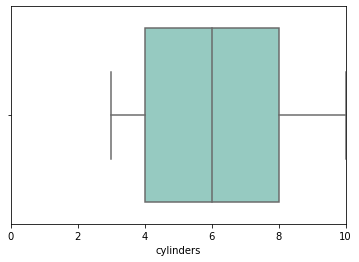

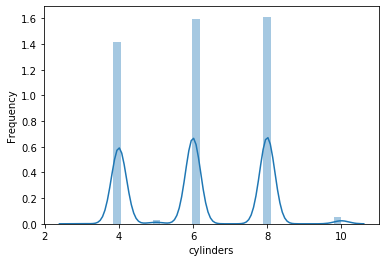

The distribution is skewed to the right
---------------------------------------
count    51525.000000
mean         6.123649
std          1.660548
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: cylinders, dtype: float64

-----------Percentile-------------
Percentile Lower border: 4.0
Percentile Upper border: 8.0
----------------------------------
Any values below 4.0 and above 8.0 can consider outliers
We have 651 values that can consider outliers

-------------IQR------------------
The interquartile range are: 4.0
IQR Lower border: -2.0
IQR Upper border: 14.0
-----------------------------------
The outliers are considered to be values above 14.0
We have 0 values that can consider outliers


In [58]:
# distribution vehicle's cylinders
whis_box('cylinders',vehicles_ads,10)
distribution('cylinders',vehicles_ads)

<b style="font-size: 130%">'cylinders' after filterd out</b>


histogram of: cylinders


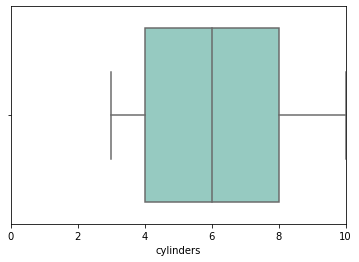

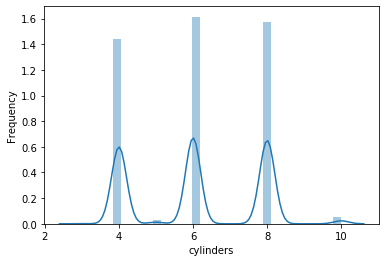

The distribution is skewed to the right
---------------------------------------
count    49230.000000
mean         6.093764
std          1.657660
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: cylinders, dtype: float64

-----------Percentile-------------
Percentile Lower border: 4.0
Percentile Upper border: 8.0
----------------------------------
Any values below 4.0 and above 8.0 can consider outliers
We have 617 values that can consider outliers

-------------IQR------------------
The interquartile range are: 4.0
IQR Lower border: -2.0
IQR Upper border: 14.0
-----------------------------------
The outliers are considered to be values above 14.0
We have 0 values that can consider outliers


In [59]:
# distribution vehicle's cylinders filterd
whis_box('cylinders',vehicles_filtered,10)
distribution('cylinders',vehicles_filtered)

<h4>Histogram cylinders</h4>

This histogram shows the distribution of the vehicle's number of `cylinders` in the data. 

We can see that the distribution is **skewed right**.

the most vehicle in our list have 4, 6 and 8 `cylinders`. 

and the spread of the number of cylinders ranges are 3 - 10 `cylinders`.

<h4>condition parameter</h4>

<b style="font-size: 130%">'condition' before filter out</b>


histogram of: condition


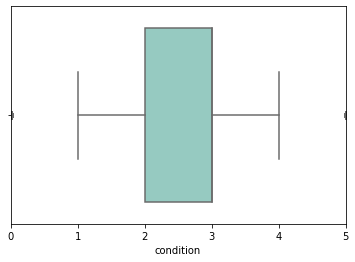

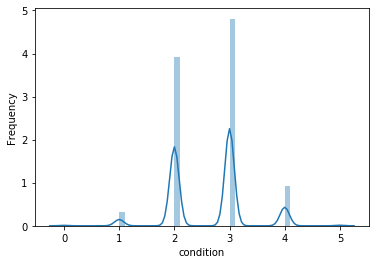

The distribution is skewed to the left
---------------------------------------
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

-----------Percentile-------------
Percentile Lower border: 2.0
Percentile Upper border: 4.0
----------------------------------
Any values below 2.0 and above 4.0 can consider outliers
We have 1865 values that can consider outliers

-------------IQR------------------
The interquartile range are: 1.0
IQR Lower border: 0.5
IQR Upper border: 4.5
-----------------------------------
The outliers are considered to be values below 0.5 and above 4.5
We have 0 values that can consider outliers


In [60]:
# distribution vehicle's condition
whis_box('condition',vehicles_ads,5)
distribution('condition',vehicles_ads)

<b style="font-size: 130%">'condition' after filterd out</b>


histogram of: condition


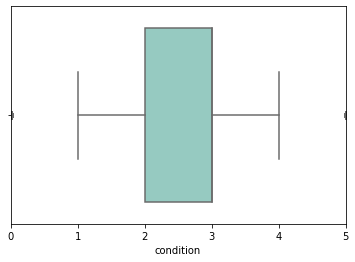

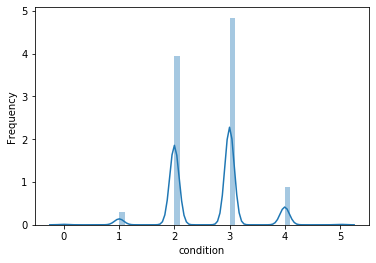

The distribution is skewed to the left
---------------------------------------
count    49230.000000
mean         2.632988
std          0.702702
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

-----------Percentile-------------
Percentile Lower border: 2.0
Percentile Upper border: 4.0
----------------------------------
Any values below 2.0 and above 4.0 can consider outliers
We have 1661 values that can consider outliers

-------------IQR------------------
The interquartile range are: 1.0
IQR Lower border: 0.5
IQR Upper border: 4.5
-----------------------------------
The outliers are considered to be values below 0.5 and above 4.5
We have 0 values that can consider outliers


In [61]:
# distribution vehicle's condition filterd
whis_box('condition',vehicles_filtered,5)
distribution('condition',vehicles_filtered)

<h4>Histogram condition</h4>

This histogram shows the distribution of the vehicle `condition` in the data. 

We can see that the most vehicle in our list between good or excellent `condition`.

Very few salvage, fair and new vehicles are listed.

The spread of the condition ranges from *salvage* at 0 to *new* at 5, with a median at 3 (*excellent* condition).

<b style="font-size: 130%">Intermediate conclusions</b>

after seen five chart, we can tell that the first three (`price`,`age`,`odometer`) been distribution right-skewed and have outliers, when the last two `cylinders` distribution is right-skewed and `condition` distribution is left-skewed from the IQR check there isn't any outliers in there field.

let's filter some outliers  

In [62]:
# statistics of the unfiltered data
vehicles_ads[['price', 'age', 'odometer', 'cylinders', 'condition']].describe()

price           age       odometer     cylinders     condition
count   51525.000000  51525.000000   51525.000000  51525.000000  51525.000000
mean    12132.449432      9.510412  115560.604309      6.123649      2.637535
std     10040.821729      6.080608   59888.409498      1.660548      0.712447
min         0.000000      1.000000       1.000000      3.000000      0.000000
25%      5000.000000      5.000000   79181.000000      4.000000      2.000000
50%      9000.000000      9.000000  115553.000000      6.000000      3.000000
75%     16839.000000     13.000000  146541.000000      8.000000      3.000000
max    375000.000000     90.000000  990000.000000     10.000000      5.000000

<b style="font-size: 130%">Intermediate conclusions</b>

Initial visualization to detect outliers, we can observe that the price, age and odometer variables have significant outliers. Looking at the price variable, it is easy to detect outliers resulting from incorrect data. The minimum price is 0 and the maximum price is 375,000 (after we filter it's down to 42k). Similarly, in the age_in_years variable, the mean age is ≈9 years, while the maximum vehicle age is 90 years (after we filter it's down to 27k). There is clearly an outlier in this variable. We can see that there is so much outlier in the data that we have to remove them before we can proceed with analysis. In some other cases, the outlier may not be so visible thus we have to use some mathematical technique to identify and remove them.

We use the `stats` package in scipy to determine the *Z-score* and filter the data to obtain the distribution where the mean is 0 and the standard deviation is 1. 

In [63]:
# finding z-score in price
stats.zscore(vehicles_ads[['price']])

# z-score for price, age and odometer given as an array
stats.zscore(vehicles_ads[['price', 'age', 'odometer']])

# z-score in vehicles_filtered
vehicles_filtered

array([[-0.27213669],
       [ 1.3313333 ],
       [-0.66055488],
       ...,
       [-0.81492621],
       [-0.46584781],
       [-0.58087935]])

array([[-2.72136686e-01, -2.48400671e-01,  4.91575609e-01],
       [ 1.33133330e+00, -2.48400671e-01, -4.48431761e-01],
       [-6.60554880e-01, -4.12859509e-01, -9.28503247e-02],
       ...,
       [-8.14926214e-01,  8.05170043e-02,  2.07711584e-01],
       [-4.65847811e-01, -5.77318347e-01,  4.00956194e-01],
       [-5.80879353e-01, -7.41777185e-01, -1.26975861e-04]])

price  model_year           model  condition  cylinders      fuel  \
0       9400        2011          bmw x5          2          6  gasoline   
1      25500        2011      ford f-150          2          6  gasoline   
2       5500        2013  hyundai sonata          4          4  gasoline   
3       1500        2003      ford f-150          1          8  gasoline   
4      14900        2017    chrysler 200          3          4  gasoline   
...      ...         ...             ...        ...        ...       ...   
49225   9249        2013   nissan maxima          4          6  gasoline   
49226   2700        2002     honda civic          0          4  gasoline   
49227   3950        2009  hyundai sonata          3          4  gasoline   
49228   7455        2013  toyota corolla          2          4  gasoline   
49229   6300        2014   nissan altima          2          4  gasoline   

       odometer transmission        type paint_color  is_4wd date_posted  \
0        145000    automatic         suv      custom       1  2018-06-23   
1         88705    automatic         suv       white       1  2018-10-19   
2        110000    automatic  famliy_car         red       0  2019-02-07   
3        115553    automatic      pickup      custom       0  2019-03-22   
4         80903    automatic  famliy_car       black       0  2019-04-02   
...         ...          ...         ...         ...     ...         ...   
49225     88136    automatic  famliy_car       black       0  2018-10-03   
49226    181500    automatic  famliy_car       white       0  2018-11-14   
49227    128000    automatic  famliy_car        blue       0  2018-11-15   
49228    139573    automatic  famliy_car       black       0  2018-07-02   
49229    115553    automatic  famliy_car      custom       0  2018-06-05   

       days_listed     brand  week  month  year  dow  age  avg_miles_year  
0               19       bmw    25      6  2018    5    8           18125  
1               50      ford    42     10  2018    4    8           11088  
2               79   hyundai     6      2  2019    3    7           15714  
3                9      ford    12      3  2019    4   17            6797  
4               28  chrysler    14      4  2019    1    3           26967  
...            ...       ...   ...    ...   ...  ...  ...             ...  
49225           37    nissan    40     10  2018    2    6           14689  
49226           22     honda    46     11  2018    2   17           10676  
49227           32   hyundai    46     11  2018    3   10           12800  
49228           71    toyota    27      7  2018    0    6           23262  
49229           10    nissan    23      6  2018    1    5           23110  

[49230 rows x 20 columns]

<h4>Use filtered data to plot new histogram</h4>

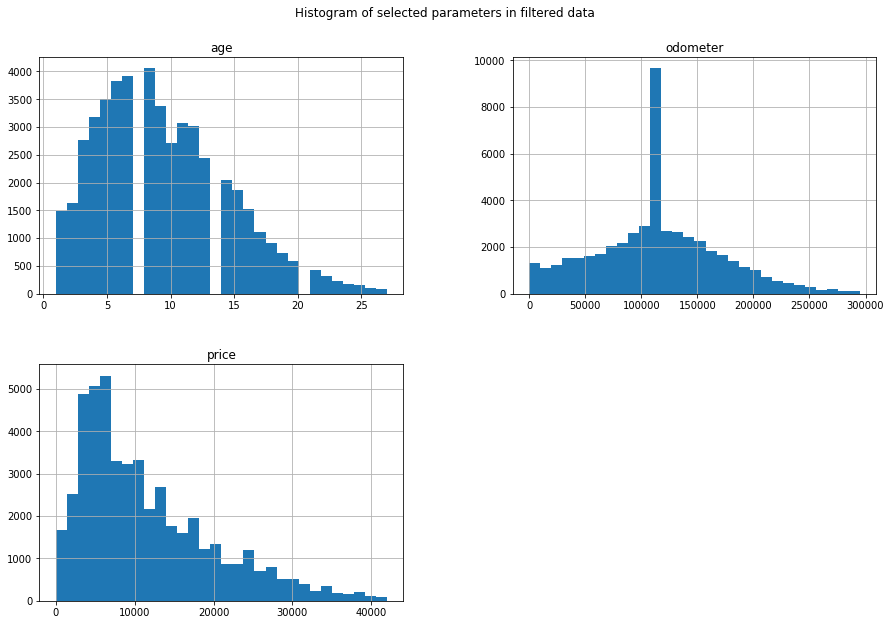

In [64]:
# plot of histogram for filtered data
vehicles_filtered[['price', 'age', 'odometer']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of selected parameters in filtered data', y=0.95);

<b style="font-size: 130%">Intermediate conclusions</b>

The intuition behind *Z-score* is to find the distribution of data where the mean is 0 and the standard deviation is 1. While calculating the *Z-score*, we re-scaled and centered the data and look for points that are too far from zero which will be treated as outliers using a threshold. If the *Z-score* value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers. Before the Z-score calculation, we had extremely high values to the right of the histogram, and the distribution was rightly-skewed. After removing outliers using the *Z-score* technique, the distribution is almost a normal distribution. 

In [65]:
# statistics of the filtered data
vehicles_filtered[['price', 'age', 'odometer']].describe()

price           age       odometer
count  49230.000000  49230.000000   49230.000000
mean   11552.227138      9.356754  114835.959009
std     8478.080816      5.149738   55526.461098
min        0.000000      1.000000       1.000000
25%     4999.000000      5.000000   80000.000000
50%     8995.000000      9.000000  115553.000000
75%    15995.000000     13.000000  147000.000000
max    42000.000000     27.000000  295010.000000

<b style="font-size: 130%">Intermediate conclusions</b>

looking at the statistics of the filtered vehicle data, we observe that the outliers in the initial dataset have been removed, for instance the maximum price in the filtered data is 42k against 375k in the initial dataset. Also, the 50% percentile of the filtered data is closer to the mean of the data. This means we were successful in the process of removing outliers from our data.

<h4>Analyze days advertisements were displayed</h4>

We can study how many days advertisements were displayed `days_listed`.

<b style="font-size: 130%">'days_listed' before filter out</b>


histogram of: days_listed


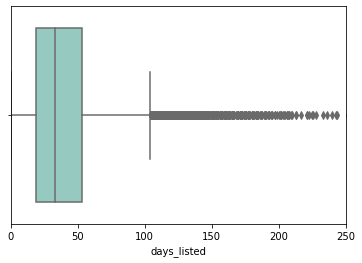

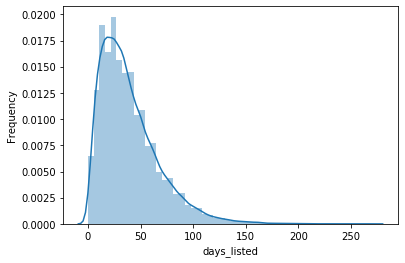

The distribution is skewed to the right
---------------------------------------
count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

-----------Percentile-------------
Percentile Lower border: 7.0
Percentile Upper border: 94.0
----------------------------------
Any values below 7.0 and above 94.0 can consider outliers
We have 4917 values that can consider outliers

-------------IQR------------------
The interquartile range are: 34.0
IQR Lower border: -32.0
IQR Upper border: 104.0
-----------------------------------
The outliers are considered to be values above 104.0
We have 1618 values that can consider outliers


In [66]:
whis_box('days_listed',vehicles_ads,250)
distribution('days_listed',vehicles_ads)

<b style="font-size: 130%">'days_listed' after filter out</b>


histogram of: days_listed


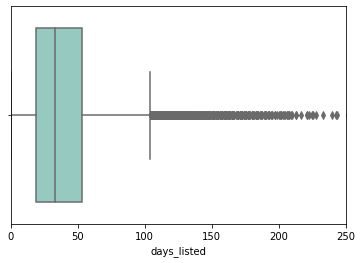

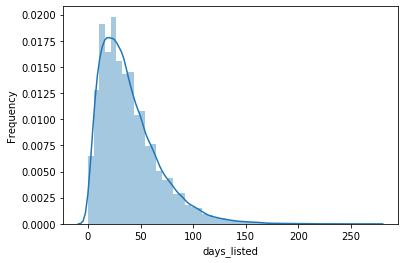

The distribution is skewed to the right
---------------------------------------
count    49230.000000
mean        39.552671
std         28.223716
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

-----------Percentile-------------
Percentile Lower border: 7.0
Percentile Upper border: 94.0
----------------------------------
Any values below 7.0 and above 94.0 can consider outliers
We have 4699 values that can consider outliers

-------------IQR------------------
The interquartile range are: 34.0
IQR Lower border: -32.0
IQR Upper border: 104.0
-----------------------------------
The outliers are considered to be values above 104.0
We have 1546 values that can consider outliers


In [67]:
# column 'days_listed' after filter out
whis_box('days_listed',vehicles_filtered,250)
distribution('days_listed',vehicles_filtered)

In [68]:
# statistics for days_listed
days_listed_0 = vehicles_filtered.query('days_listed <= 1')
days_listed_100 = vehicles_filtered.query('days_listed > 100')
print('Mean ad displayed for {:.2f} days or median {:.1f} days'
      .format(vehicles_filtered['days_listed'].mean(), vehicles_filtered['days_listed'].median())
      ,'also ads that exist less in day stay around {:.1f} hours'.format(days_listed_0['days_listed'].mean() * 24))

Mean ad displayed for 39.55 days or median 33.0 days also ads that exist less in day stay around 18.4 hours


In [69]:
# vehicles with listing time of less/or for one day
days_listed_0.shape

(213, 20)

In [70]:
# vehicles with listing time more than 100 days
days_listed_100.shape

(1861, 20)

<b style="font-size: 130%">Intermediate conclusions</b>

The histogram above shows the distribution of days vehicle was listed after removing outliers. We can see that the mean lifetime of an ad is 39 days and the median is 33 days. In general, the lifetime of an ad appears to be around one month. There are ads that were listed for 0 days. This could be because the car sold or ad was not listed for a full day. There are also ads that were up for 271 days. That is almost a year which is a long time for a car to be on sale! However, it's not impossible. The expected listing length of about a month seems to match what we'd expect in the real world.

Analysis the number of days an advertisement was displayed, we can see that the typical lifetime of an ad is around month with more than 14k ads listed.

By inspecting the histogram, we determined that ~40 ads were listed and removed same day or listed for 0 days. This could be because the vehicle sold out the same day hence the ad was not listed for a full day. Also, 213 ads was listed and removed next day or listed for just day. We can also observe that about 1861 ads were listed for more than 100 days, and some ads staying up for 271 days. That is quite a long time for a car to be on sale. However, it is not impossible! The expected listing length of a month seems to match what we would expect in the real world. We can conclude that ads were removed quickly after day, ads were abnormally listed for 271 days.

To ensure that we do not introduce bias in the data when carrying out analysis, we would be assuming that vehicles listed after 7 days, and less than 100 days is the appropriate duration for the vehicle listing. One week is appropriate for a car to be listed and sold if the car is in *good* or *excellent* condition, and about 100 days is appropriate if the car is in *fair* condition. We do this because we wouldn't want to exclude too many data points by using the average of 39 days.

<h4>Check our Clean Data</h4>

In [71]:
# print head from our filtered/clean data 
vehicles_filtered.head(10)

# print sample from our filtered/clean data 
vehicles_filtered.sample(10)

# print our filtered/clean data 
vehicles_filtered.describe()

price  model_year           model  condition  cylinders      fuel  \
0   9400        2011          bmw x5          2          6  gasoline   
1  25500        2011      ford f-150          2          6  gasoline   
2   5500        2013  hyundai sonata          4          4  gasoline   
3   1500        2003      ford f-150          1          8  gasoline   
4  14900        2017    chrysler 200          3          4  gasoline   
5  14990        2014    chrysler 300          3          6  gasoline   
6  12990        2015    toyota camry          3          4  gasoline   
7  15990        2013     honda pilot          3          6  gasoline   
8  11500        2012     kia sorento          3          4  gasoline   
9   9200        2008     honda pilot          3          6  gasoline   

   odometer transmission        type paint_color  is_4wd date_posted  \
0    145000    automatic         suv      custom       1  2018-06-23   
1     88705    automatic         suv       white       1  2018-10-19   
2    110000    automatic  famliy_car         red       0  2019-02-07   
3    115553    automatic      pickup      custom       0  2019-03-22   
4     80903    automatic  famliy_car       black       0  2019-04-02   
5     57954    automatic         suv       black       1  2018-06-20   
6     79212    automatic  famliy_car       white       0  2018-12-27   
7    109473    automatic         suv       black       1  2019-01-07   
8    104174    automatic         suv      custom       1  2018-07-16   
9    147191    automatic         suv        blue       1  2019-02-15   

   days_listed     brand  week  month  year  dow  age  avg_miles_year  
0           19       bmw    25      6  2018    5    8           18125  
1           50      ford    42     10  2018    4    8           11088  
2           79   hyundai     6      2  2019    3    7           15714  
3            9      ford    12      3  2019    4   17            6797  
4           28  chrysler    14      4  2019    1    3           26967  
5           15  chrysler    25      6  2018    2    5           11590  
6           73    toyota    52     12  2018    3    4           19803  
7           68     honda     2      1  2019    0    7           15639  
8           19       kia    29      7  2018    0    7           14882  
9           17     honda     7      2  2019    4   12           12265

price  model_year                model  condition  cylinders      fuel  \
13379  18499        2013            dodge ram          3          8  gasoline   
22566   3400        2003       subaru outback          2          4  gasoline   
46713   8500        2013    chevrolet equinox          3          4  gasoline   
35753  32997        2011  chevrolet silverado          3          8  gasoline   
41487  32997        2014      gmc sierra 1500          4          8  gasoline   
14380  22999        2011        ford explorer          3          6  gasoline   
26817   3750        2012    chevrolet equinox          2          4  gasoline   
34768   1200        2005          ford taurus          2          6  gasoline   
30236  23490        2012            dodge ram          2          6  gasoline   
22120  37900        2016        ford f-250 sd          2          8    diesel   

       odometer transmission        type paint_color  is_4wd date_posted  \
13379     79771    automatic         suv      custom       1  2019-03-17   
22566    167000    automatic         suv       white       1  2018-12-13   
46713     58023    automatic         suv       white       0  2018-08-06   
35753     28532    automatic         suv      custom       1  2018-11-14   
41487     79202    automatic         suv       white       1  2018-10-19   
14380     60010    automatic         suv      custom       1  2019-03-15   
26817    164000    automatic         suv      custom       1  2018-05-19   
34768     93000    automatic  famliy_car       green       0  2019-03-17   
30236     94978    automatic         suv       white       1  2018-09-16   
22120    102195    automatic         suv       white       1  2018-09-05   

       days_listed      brand  week  month  year  dow  age  avg_miles_year  
13379           61        ram    11      3  2019    6    7           11395  
22566           72     subaru    50     12  2018    3   16           10437  
46713           32  chevrolet    32      8  2018    0    6            9670  
35753           32  chevrolet    46     11  2018    2    8            3566  
41487            3        gmc    42     10  2018    4    5           15840  
14380           50       ford    11      3  2019    4    9            6667  
26817           92  chevrolet    20      5  2018    5    7           23428  
34768           42       ford    11      3  2019    6   15            6200  
30236           56        ram    37      9  2018    6    7           13568  
22120           43       ford    36      9  2018    2    3           34065

price    model_year     condition     cylinders       odometer  \
count  49230.000000  49230.000000  49230.000000  49230.000000   49230.000000   
mean   11552.227138   2009.952387      2.632988      6.093764  114835.959009   
std     8478.080816      5.138917      0.702702      1.657660   55526.461098   
min        0.000000   1992.000000      0.000000      3.000000       1.000000   
25%     4999.000000   2007.000000      2.000000      4.000000   80000.000000   
50%     8995.000000   2011.000000      3.000000      6.000000  115553.000000   
75%    15995.000000   2014.000000      3.000000      8.000000  147000.000000   
max    42000.000000   2019.000000      5.000000     10.000000  295010.000000   

             is_4wd   days_listed          week         month          year  \
count  49230.000000  49230.000000  49230.000000  49230.000000  49230.000000   
mean       0.492809     39.552671     26.825574      6.615519   2018.309141   
std        0.499953     28.223716     15.142527      3.475268      0.462144   
min        0.000000      0.000000      1.000000      1.000000   2018.000000   
25%        0.000000     19.000000     13.000000      3.000000   2018.000000   
50%        0.000000     33.000000     27.000000      7.000000   2018.000000   
75%        1.000000     53.000000     40.000000     10.000000   2019.000000   
max        1.000000    271.000000     52.000000     12.000000   2019.000000   

                dow           age  avg_miles_year  
count  49230.000000  49230.000000    49230.000000  
mean       3.002641      9.356754    14494.784704  
std        1.995321      5.149738     7825.995728  
min        0.000000      1.000000        0.000000  
25%        1.000000      5.000000     9450.000000  
50%        3.000000      9.000000    13000.000000  
75%        5.000000     13.000000    17903.750000  
max        6.000000     27.000000    53141.000000

<h4>Analyze with at least 50 ads</h4>

In [72]:
# This function gets : dataframe, list of category cols,numeric_col,limit
# the function filter out the groups in category cols with rows under the treshold
# the function than plot boxplot
def boxplot_category_feature(df,cols,y_col,limit):
    for col in cols :
        stat = df.pivot_table(index=col,values=y_col,aggfunc='count').reset_index()
        good_list = stat[stat.price>=limit][col]
        good_data = df[df[col].isin(good_list)]
        plt.figure(figsize=(14,8))
        sns.boxplot(x=col,y=y_col,data=good_data,showfliers = False)

# Creating some lists 
category_cols_list=['model','cylinders','fuel','transmission','type','paint_color','is_4wd']
category_new_cols_list = ['brand','model','condition','price','age','days_listed','avg_miles_year','odometer']
date_cols_list=['date_posted','week','month','year','dow']
cols_types= ['price','model_year','odometer','days_listed','age','avg_miles_year','condition']

In [73]:
stat_types = vehicles_filtered.pivot_table(index='type',values='price',aggfunc=('mean','median','count')).sort_values(by='count',ascending=False).astype(int)
stat_types = stat_types.reset_index()
stat_types

type  count   mean  median
0         suv  27787  13834   11997
1  famliy_car  15027   7891    6400
2       truck   2865  11196    9950
3      pickup   1846   9927    8500
4         van   1682   8866    6995
5         bus     23  17445   10500

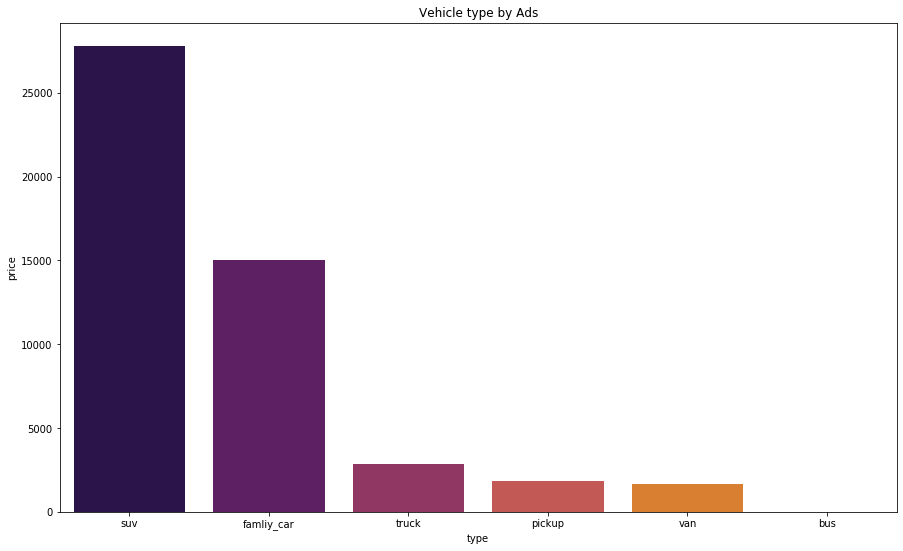

In [74]:
type_stat = vehicles_filtered.pivot_table(index='type',values='price'
                                          ,aggfunc=('count')).sort_values(by='price',ascending=False).astype(int);
# type_stat.plot(kind='bar')
type_stat= type_stat.reset_index();
pl1=plt.subplots(figsize=(15,9));
palette = sns.color_palette('inferno');
sns.barplot(x='type',y='price',palette=np.array(palette),data=type_stat);
plt.title('Vehicle type by Ads');

<h4>Find the highest number of ads by type:</h4>

In [75]:
# 1. Take each of the popular types you detected 
Ads_famliy = vehicles_filtered[(vehicles_filtered.type=='famliy_car')]
Ads_suv= vehicles_filtered[(vehicles_filtered.type=='suv')]
print('The Highest types of vehicles in our dataset is:','Suv:',len(Ads_suv),'and famliy_car:',len(Ads_famliy),'rows')

The Highest types of vehicles in our dataset is: Suv: 27787 and famliy_car: 15027 rows


In [76]:
#price depends on age, mileage, condition, transmission type, and color
cols_types = ['price','model_year','odometer','days_listed','age','avg_miles_year','condition']
cols_types_numerics=['price','age','odometer','condition']
cols_types_category=['transmission','paint_color']

<h4>SUV</h4>

In [77]:
# display the correlation in suv type
Ads_suv[cols_types_numerics].corr()

price       age  odometer  condition
price      1.000000 -0.574471 -0.445290   0.234454
age       -0.574471  1.000000  0.557412  -0.299717
odometer  -0.445290  0.557412  1.000000  -0.272241
condition  0.234454 -0.299717 -0.272241   1.000000

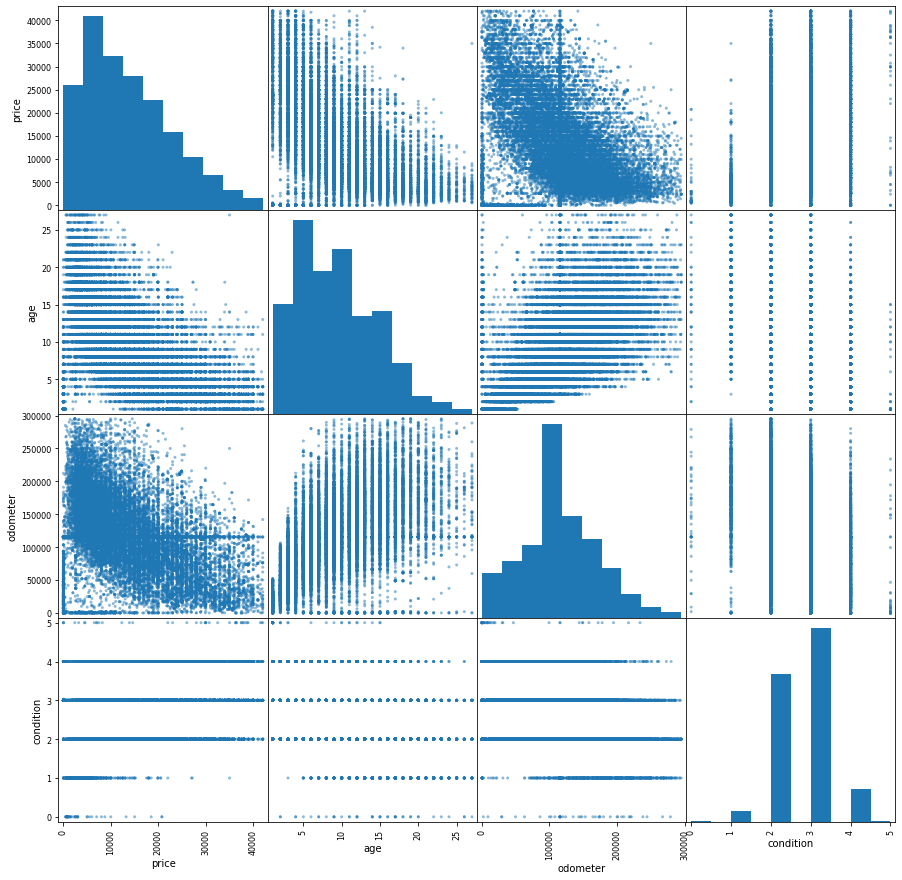

In [78]:
pd.plotting.scatter_matrix(Ads_suv[cols_types_numerics],figsize=(15,15));

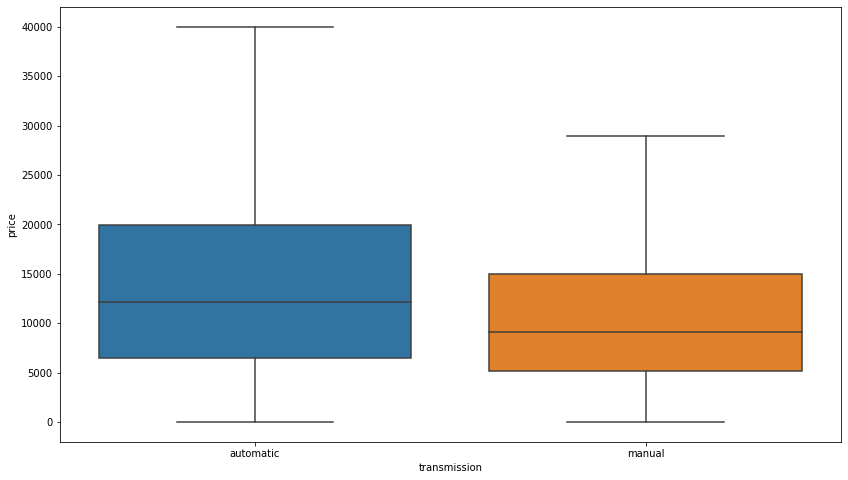

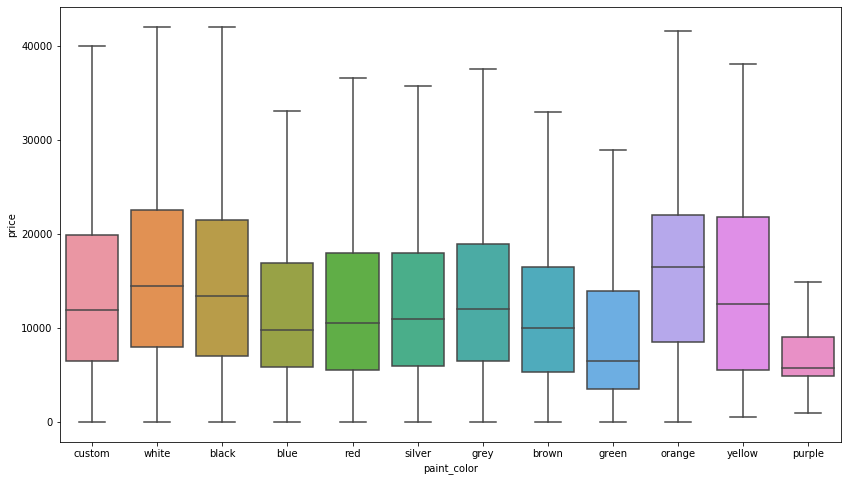

In [79]:
boxplot_category_feature(Ads_suv,cols_types_category,'price',50)

<h4> Ovarall conclusion suv type</h4>

<h5>Suv by correlation to price</h5>

**price with age**: moderate negative correlation -0.57, for most vehicles when it's get older the price is go down  

**price with odometer**: moderate negative correlation -0.44, more miles the price is lower

**age with odometer**: moderate positive correlation 0.55, this make since older driven more miles

**price with condition** : no correlation 0.23


<h5> Suv by transmission </h5>

from our boxplot we can see the Automatic have higher price and also more populer or demand than manual transmission and this

understand since if you need less things to do when you drive it's more safe and buyer prefer to buy somthing to make there

drive more comfortable in everday use.


<h5> Suv by paint_color </h5>

we can see that when it's come to colors the three most populer are the two that kind of conventional is the "white" and "black" in the other hand we van see the "orange" which is a bit more exciting and younger color choice , also the price of this three colors is more higher than other colors.

<h4>Famliy car</h4>

In [80]:
# display the correlation in famliy_car type
Ads_famliy[cols_types_numerics].corr()

price       age  odometer  condition
price      1.000000 -0.500699 -0.576648   0.167583
age       -0.500699  1.000000  0.498699  -0.231602
odometer  -0.576648  0.498699  1.000000  -0.261958
condition  0.167583 -0.231602 -0.261958   1.000000

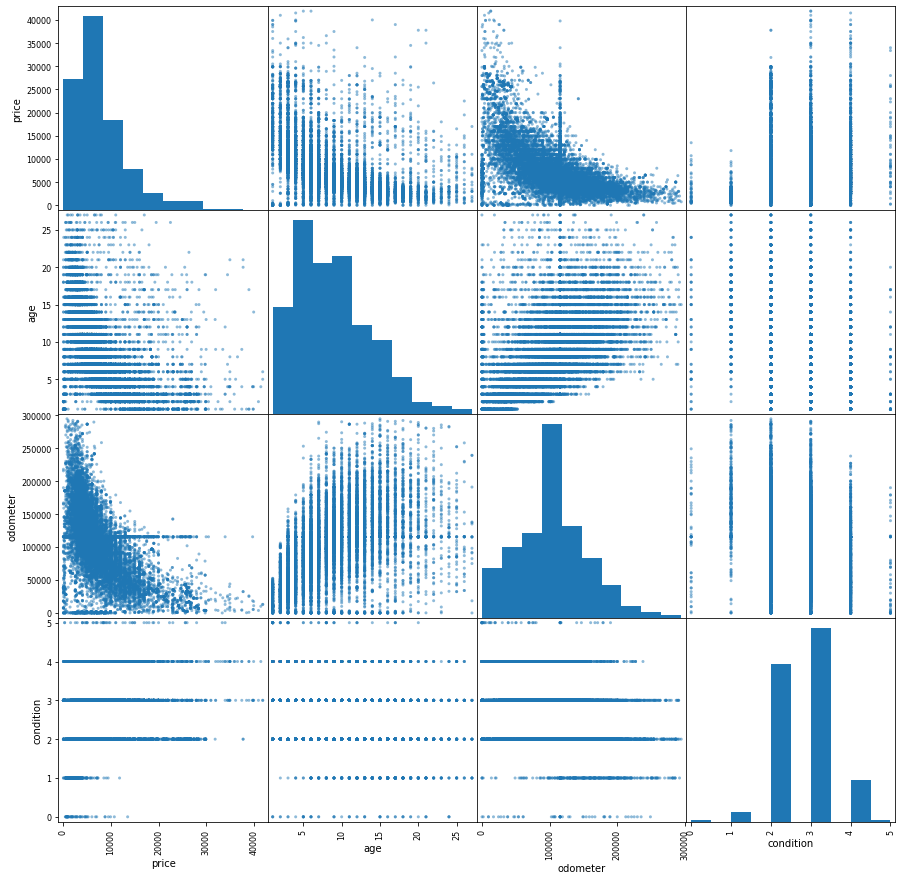

In [81]:
pd.plotting.scatter_matrix(Ads_famliy[cols_types_numerics],figsize=(15,15));

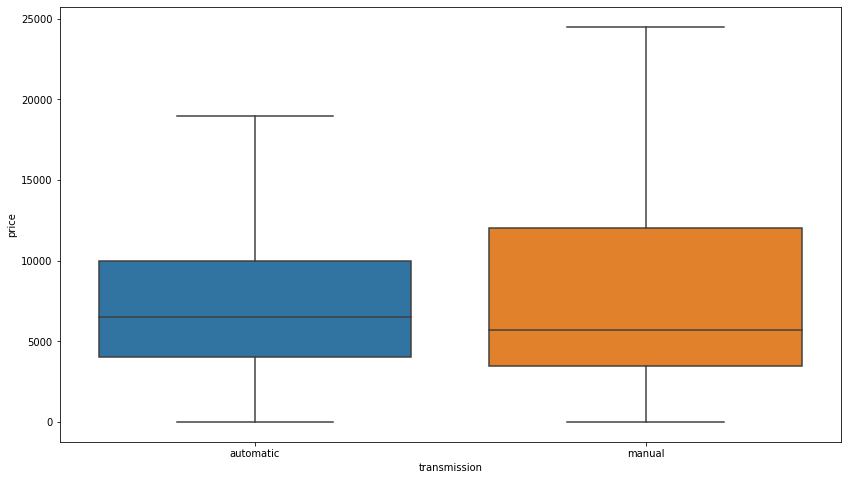

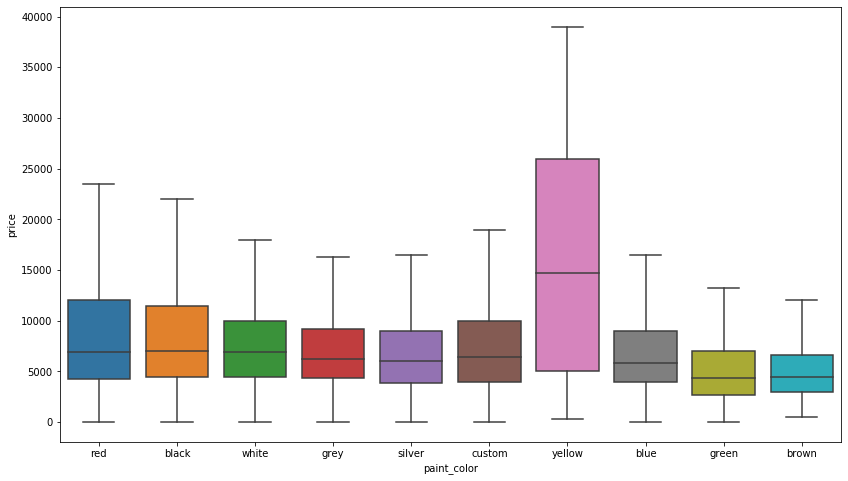

In [82]:
boxplot_category_feature(Ads_famliy,cols_types_category,'price',50)

<h4> Ovarall conclusion famliy_car type</h4>

<h5>famliy_car by correlation to price</h5>

**price with age**: moderate negative correlation -0.50, for most vehicles when it's get older the price is go down  

**price with odometer**: moderate negative correlation -0.57, more miles the price is lower 

**age with odometer**: moderate positive correlation 0.49, this make since older driven more miles

**price with condition** : no correlation found ~0.17


<h5>famliy_car by transmission</h5>

We can see in our Boxplot that manual transmission is the star when it's come to famliy_car , When the Automatic is little bit

less and this make since , unlike the "suv" which come later in the automotive world when the option for Automatic was more

populer , the inderstry start is life with one option only and this was the manual transmission.

also when buyer have issue with this simple transmission and good hands they can fix it at home and not need skill mechanical

to do it for them.  


<h5>famliy_car by paint_color </h5>

I am sure when you see this boxplot , you say how "yellow" is so on top of every other color this we ask too, but let's say 

that when it's come to famliy_car the audince is more fun and younger than the Suv world so bright color like this when you 

want to show off is the one to go.


<h4>scatter plot for the age, mileage, condition</h4>

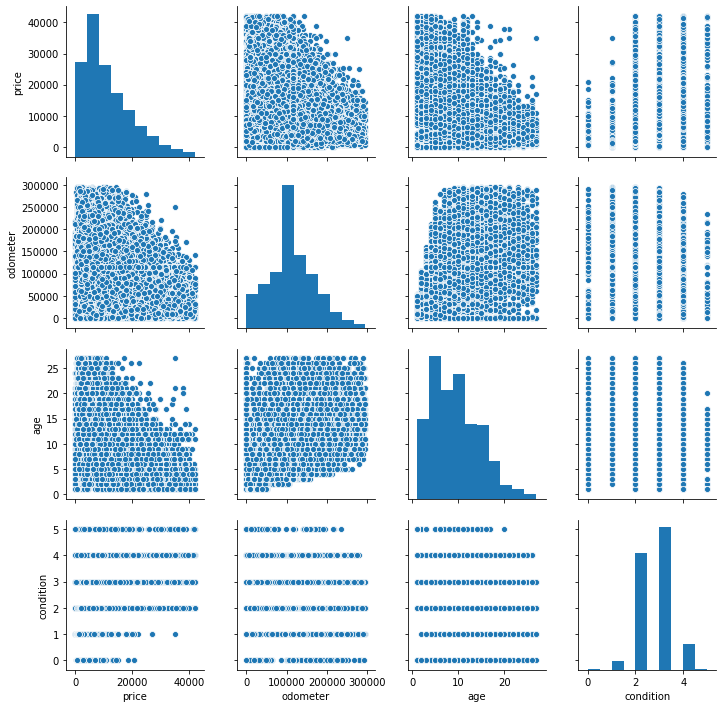

In [83]:
# scatter matrix
ax = sns.pairplot(vehicles_filtered[['price', 'odometer', 'age','condition']]);

<h5>correlation of age with mileage (odometer)</h5>

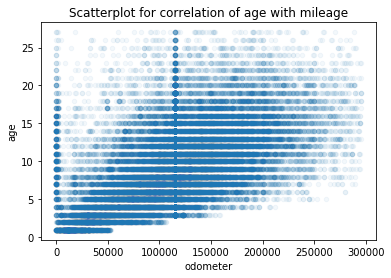

In [84]:
# correlation of age with mileage
vehicles_filtered.plot.scatter(x='odometer', y='age', title='Scatterplot for correlation of age with mileage', alpha=0.05);

Our scatterplot check the linear correlation of the age with mileage. We see that negative correlation with the mileage. As the age increases, also most of the time the miles increases.

<h5>correlation of age with condition</h5>

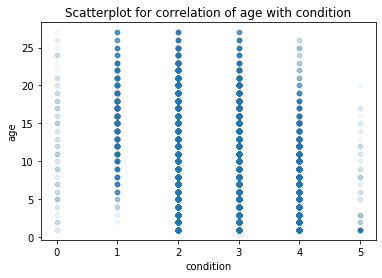

In [85]:
# correlation of age with condition
vehicles_filtered.plot.scatter(x='condition', y='age', title='Scatterplot for correlation of age with condition', alpha=0.05);

In this scatterplot we check the correlation between of the condition with age. It can be seen that most of the vehicles in our database are in the middle i.e. in relation to years most are in good to excellent condition and even some are in almost new condition. It can also be seen that the younger the vehicle, the better its condition, of course there is a low percentage of vehicles in a not very well maintained condition. Another proof that the condition of the vehicle over the years is definitely an important parameter.

<h5>correlation of age with price</h5>

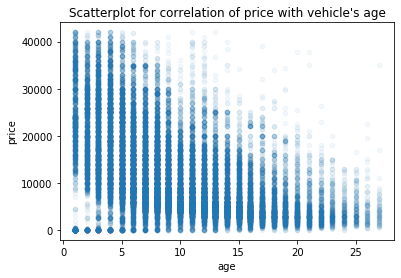

In [86]:
# correlation of price with age
vehicles_filtered.plot.scatter(x='age', y='price', title="Scatterplot for correlation of price with vehicle's age", alpha=0.05);

This scatterplot check linear correlation between price and vehicle's age. We can see that price has a negative correlation with the age of the vehicle. in other words older car = lower price. Newer cars or cars with less than 5 years old cost more and than the higher price as expected.

<h4>Additional info on our the dataset </h4>

<h5>relationship between number of ads and price</h5>

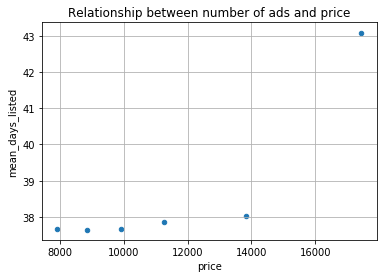

In [87]:
# scatterplot showing the relationship between number of ads and price
normal_listing = vehicles_filtered.query('7 <= days_listed <= 100').pivot_table(
    index='type', values='days_listed', aggfunc=['mean', 'count']
)
normal_listing.columns = ['mean_days_listed', 'vehicles']
normal_listing.sort_values(by='mean_days_listed', ascending=False).head()
brand_stat = vehicles_filtered.query('7 <= days_listed <= 100').pivot_table(
    index='type', values = 'price', aggfunc = 'mean')
normal_brand_listing = normal_listing.join(brand_stat, on='type').reset_index()
normal_brand_listing.plot(
    x='price', 
    y='mean_days_listed', 
    title = 'Relationship between number of ads and price', 
    kind='scatter', 
    grid=True
);

<b style="font-size: 130%">Intermediate conclusions</b>

We try to plot a relationship between number of ads and the price. There is no linear relationship observed to vehicle `price` to determined by the number of days ads were listed

<h5>mean_days_listed vs. number of vehicle listing</h5>

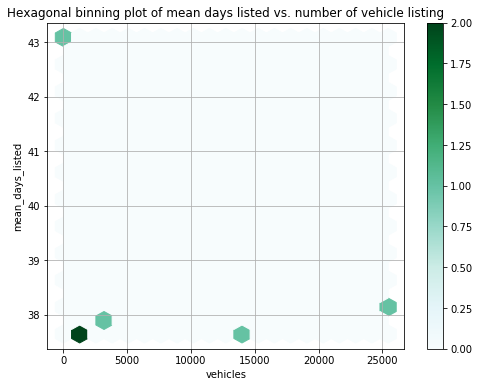

In [88]:
# hexagonal binning plot
normal_brand_listing.plot(
    x='vehicles', 
    y='mean_days_listed', 
    title='Hexagonal binning plot of mean days listed vs. number of vehicle listing',
    kind='hexbin', 
    gridsize=20, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True
);

<b style="font-size: 130%">Intermediate conclusions</b>

This hexagonal showed that number of ads and vehicle `price` are not related in any way

<h5>Interactive scatterplot showing vehicle type vs. mean days listed</h5>

In [89]:
# plotting interactive scatter plots
fig = px.scatter(normal_brand_listing, x='mean_days_listed', y='vehicles',
                 title='Interactive scatterplot showing vehicle type vs. mean days listed',
                 size='price', color='type', hover_name='type')
fig.update_layout(width=900, 
                  height=450
)   

<h4>Determine what factors impact price the most</h4>

In [90]:
# create new variable for popular vehicles
good_vehicles_filtered = vehicles_filtered.query('7 <= days_listed <= 100')

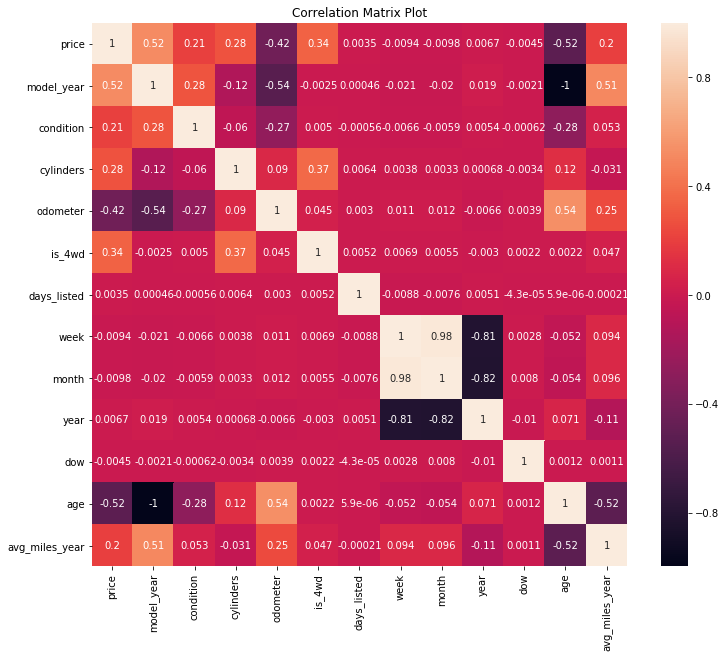

In [91]:
# correlation matrix 
plt.figure(figsize=(12, 10));

corrMatrix = good_vehicles_filtered.corr();
sns.heatmap(corrMatrix, annot=True);
plt.title('Correlation Matrix Plot');

In this Matrix correlation, we can see that our weak postive point correlation is between`model_year`and `price` with value of 0.52, also `age` with negative correlation with `price`.

<h5>vehicle type in terms of price</h5>

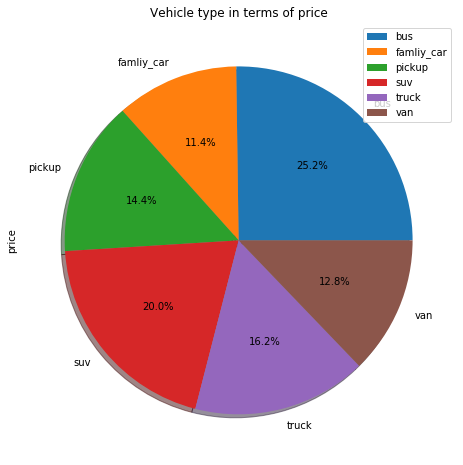

In [92]:
# pie chart visualize the relative size of these vehicle type in terms of price
(vehicles_filtered.pivot_table(index='type', values='price', 
                           aggfunc=['count', 'mean']).plot(y='mean', kind='pie', title = 'Vehicle type in terms of price', 
           figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

Our plot chart show the Vehicle type in terms of price , we can see that our top three type is `bus` with 25.2% follow by 20.0% `suv` and `truck` with 16.2%.

<h5>price with condition</5>

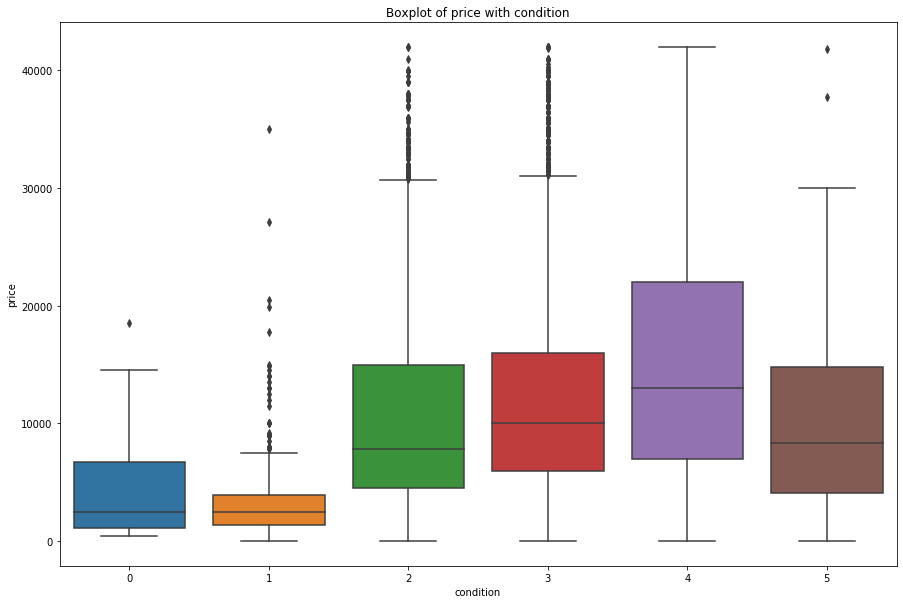

In [93]:
# box plot of price with condition
plt.figure(figsize=(15,10));
ax = sns.boxplot(x='condition', y='price', data=vehicles_filtered.query('days_listed >= 50'));

# add title
plt.title('Boxplot of price with condition');

We can see it clear that there is a direct effect on the condition of the vehicle in relation to the asking price. can at any age that keep it like new / new (4-5) condtion will sale for higher price. when vehicle in fair shape (1) will sale for much less.

<h5>correlation price with cylinders</h5>

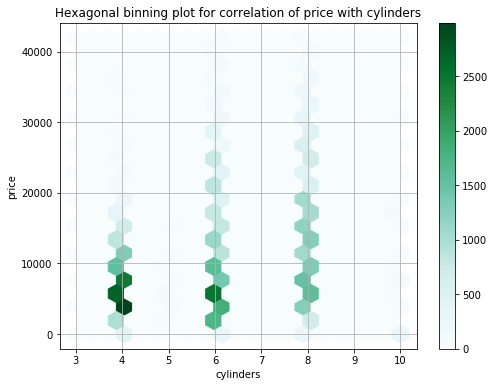

In [94]:
# correlation of price with cylinders
vehicles_filtered.plot(
    x='cylinders', y='price', title = 'Hexagonal binning plot for correlation of price with cylinders', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
);

At this hexagonal plot we can see that most of our vehicles in the dataset comes with 6 and 8 cylinders. which mean this car have higher demand which also bring the sale price to higher than other engine configuration. usually more cylinders bigger engine and better performance thank to more horsepower = more expansive.

<h5>price with transmission</h5>

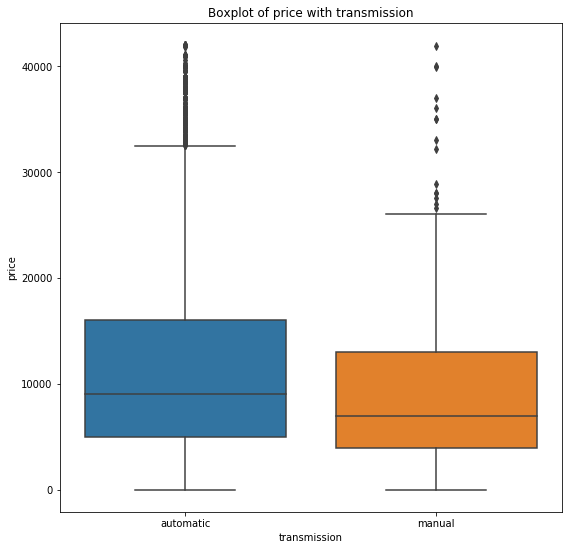

In [95]:
plt.figure(figsize=(9,9));
ax = sns.boxplot(x='transmission', y='price', data=vehicles_filtered.query('days_listed >= 50'));

# add title
plt.title('Boxplot of price with transmission');

In this boxplot we can see relationship between transmission and price, it's obviously that transmission has an influence on the price point. there is no doubt that the buyer will prefer a vehicle with an automatic transmission over the manual one for couple of reasons, the main of which is the easy of operation and convenience that it is not necessary while driving to take the hand off the steering wheel or tamper with another component to control driving. and when there is demand the price goes up. also the start price point since new can come up to ~30% more.

<h5>price with is_4wd</h5>

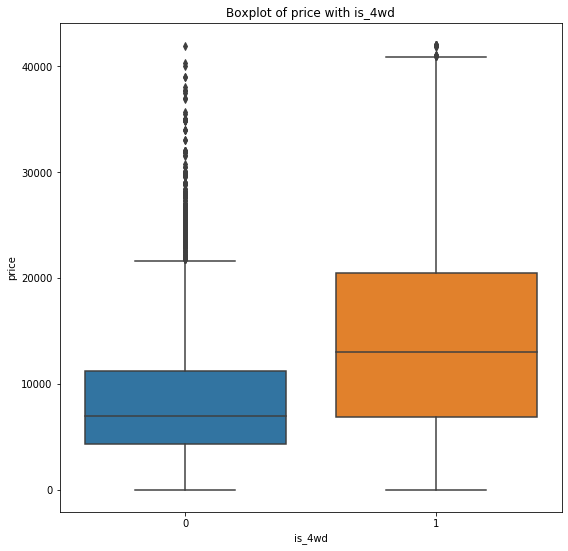

In [96]:
plt.figure(figsize=(9,9));
ax = sns.boxplot(x='is_4wd', y='price', data=vehicles_filtered.query('days_listed >= 50'));

# add title
plt.title('Boxplot of price with is_4wd');

Here we can see relationship between price and if the vehicle have All wheel drive system (AKA 4wd) or not , the price is higher when the car have this system since it's offer better performance in offroad driving. this to be expected because cars with 4wd will likely be a 6- or 8-cylinder vehicle and they cost more since new. also buyer will prefer to pay the extra to own a car with 4wd also for safety issues.

<h5>price with paint color</h5>

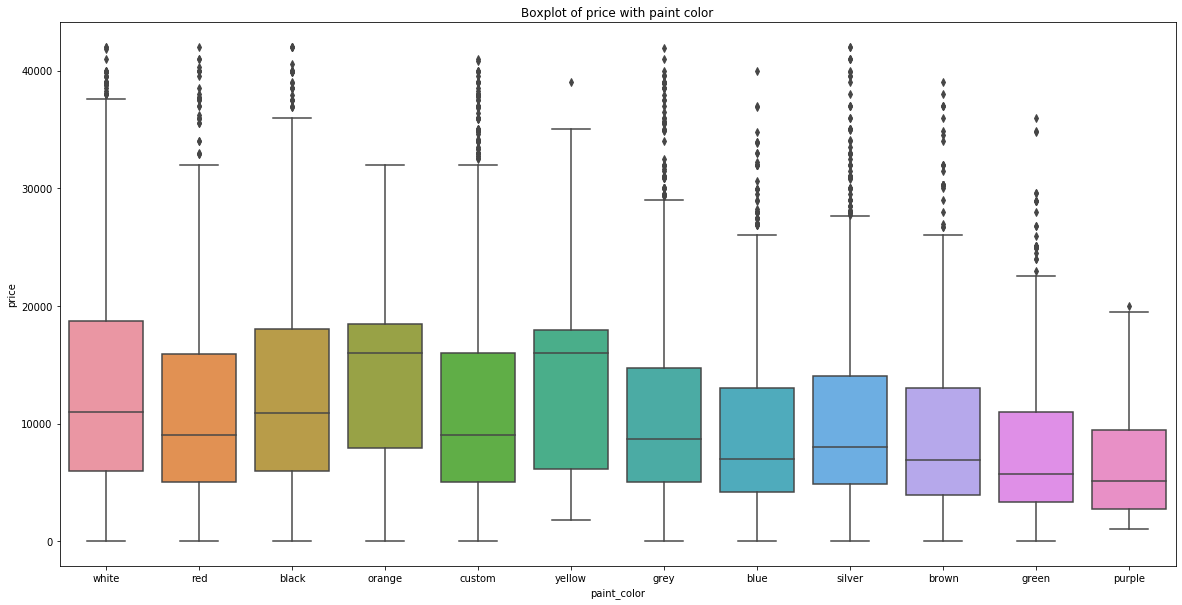

In [97]:
plt.figure(figsize=(20,10));
ax = sns.boxplot(x='paint_color', y='price', data=vehicles_filtered.query('days_listed >= 50'));

# add title
plt.title('Boxplot of price with paint color');

When we look at this boxplot of 'price' with 'paint_color', there isn't a clear difference in price based on the color. The distribution of price between different color categories have a significant overlap, so paint color would not be a good predictor of price.

<h4>Conclusion</h4>

We generated a pie chart using the relative size of the vehicle type in terms of price. we then plotted scatter plot to illustrate the correlation of certain features with price.

The plot of correlation with mileage shows a negative correlation with the higher the mileage, the lower the price. Typically, fewer miles translate to higher resale value. Similar observation was noticed in the correlation plot of age with price. We observed that as the age of a vehicle increases, the price decreases.

when it's come to condition we found that the better overall package the price is higher for great one , in the other hand if it's poor of "fair" the price go lower can be much lower.

We also noticed that vehicles with 4wd system get higher price than vehicles without the system. Looking at the scatterplot for the correlation of transmission type with price, we can see that vehicles with automatic transmission command higher price than manual transmission type.

This shows that type of transmission is an important factor that affects vehicle price. The distribution of price between different color categories have a significant overlap, and so `paint_color` would not be a good predictor of price in most cases. 

<div id="6"><h2>VI - General conclusion</h2></div>

<b><u>INTRODUCTION</u></b>

Our goal in Project II as analysis it's to determine if there is values that can influnce the price of a vehicle when the time come to sale and an advertising and if values like avg_miles_year , age , condition , 4wd and engine with more cylinders can help it sale at higher price. and if vehicle with less impressive details will be sale for lower price , the answer in the end of this page.

<b><u>The Dataset contains the following info columns:</u></b>

`price` - the market value or seller amount request for sale it


`model_year` - when the car was made or sale by the dealership 


`model`- the factory name for the car


`condition` - the current status compere to what the car staus was new


`cylinders` - numbers of chambers where fuel is combusted


`fuel` — gas, diesel, etc.


`odometer` — the vehicle's mileage when the ad was published


`transmission` - manual , automatic , etc.


`paint_color` - the outside color & paint finish solid, metallic etc.


`is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)


`date_posted` — the date the ad was published


`days_listed` — from publication to removal


<b><u>Data PROCESSING - Missing values</u></b>

as soon as we start explorer or dataset we notice that there are few columns with missing values: 


`is_4wd`: only 25572 of 51525 rows (diffrence of 25953 rows)

`paint_color`: only 42258 of 51525 rows (diffrence of 9267 rows)

`odometer`: only 43633 of 51525 rows (diffrence of 7892 rows)

`cylinders`: only 46265 of 51525 rows (diffrence of 5260 rows)

`model_year`: only 47906 of 51525 rows (diffrence of 3619 rows)


we fill the missing values in diffrent techniques : fillna and replace the Nan with 0 like in `is_4wd` and or `odometer` than with mean, add Nan value into exist value like in the case of `paint_color` to the value "custom", using transform , groupby and lambda in`model_year` and `cylinders`. we also used replace to changne values in `model_year` after checking in google the correct year of start production. 

<b><u>Carry out exploratory data analysis</u></b>

other than that we modifed the `condition` string value to numreic using dictionary, orgnize the `type` so won't be other value also replace the "electric" in `fuel` with "`other`" , replace the "`other`" in `transmission` with automatic etc. we add news columns like `age` , `brand` ,`dow` , `week`, `year` and `avg_miles_year` using datetime remove "inf" values also using str to lower the case in `type` , replace diffrnet values and put new one insted like famliy car for other and diffrent body configortion and news of the model.

<b><u>Closer look at each of one of these variables (distribution, correlation, outliers)</u></b>

also been used sns , z-score , hist, irq etc' to check corroltion and find outliers to remove and filter our dataset to be more effective when all the time we try to prevent from removeing to much data and try fix if possible. so now our filterd dataset is 49230 from 51525 with all the values in each column and noting is missing.

so what we learn that color doesn't bring a higher price car , but like new `condition` yes also 4wd , automatic and cars with 6 or 8 `cylinders` also some ads remove under 24hrs and some stay much much longer. also we can see fair `condition` lower the price also none 4wd system , less `cylinders` and manual `transmission` and of course high miles a year. 

we also discovery that our missing values random MAR.


<b><u>Compere to types of vehicle with at least 50 ads to do data analysis on them</u></b>

and we found that fit the bill "suv" and "famliy_car" , we found that in "suv" buyer prefer automatic in "white', "black" or "orange" before other colors , when in the "famliy_car" the manual and on top the bright color "yellow" is prefer on top of other colors , also we found that **price with age** both show moderate negative correlation -0.50 "famliy_car" , -0.57 "suv" also in **price with odometer** -0.57 "famliy_car" , -0.44 "suv" , when in **age with odometer** moderate positive correlation 0.49 "famliy_car" , 0.55 "suv" , and **price with condition** no correlation found ~0.17 "famliy_car", 0.23 "suv". 

we also comprere age, mile (odometer) , condition between them and with few other parameters like price and see how it's impact consder the price when it's come to sale and we can say that like the "suv" and "famliy_car" , like if you take care and keep it in like new condtion the price will be higher insted of lower price if it's "fair" also low miles will sale for higher price.

<h4>Overall conclusion</h4>

What did we learn from this project, regarding advertisements for sale, that the color of the car did not increase its price and this is in contrast to the gearbox, dual propulsion system and of course keeping the vehicle closest to the day it left the factory and if the car has more cylinders is more attractive. Probably higher. A car that is not stored properly and has a high mileage will usually find itself longer in the bulletin board and its price was very low compared to a car that is in much better condition, we also discovered that there are details that were not entered or dropped from the database we originally created and create empty entries in the database.

So if you want to sale your vehicle fast, keep it close to is orginal shap , drive low mileage a year and it's better to take the version with 4WD automatic with bigger engine  6 or 8 cylinders. 